In [243]:
import os
import warnings
import glob
import pandas as pd
import time
import numpy as np
import math
from datetime import timedelta
from datetime import datetime as dt
from scipy import optimize

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [391]:
os.getcwd()

'/Users/denisbondarenko/OneDrive - НИУ Высшая школа экономики/Data for term paper'

In [3]:
path = os.getcwd()+'/MICEX/'

In [4]:
orders = os.listdir(path=path)

In [6]:
import zipfile

In [ ]:
# n = 0
# # 20150409 cannot be downloaded. Problems with 20150825, 20150603, 20150716
# for order in orders:
    
#     if order[-4:] != '.zip': continue
#     print(n, order)
#     with zipfile.ZipFile(path+order, 'r') as zip_ref:
#         zip_ref.extractall(path)
#     n += 1

In [80]:
files = os.listdir(path)


In [81]:
tradelogs = []
orderlogs = []
for file in files:
    if (file[-4:] == '.zip') | (file[-4:] == '.pdf'): continue
    elif file[:5] == 'Trade': tradelogs += [file]
    else: orderlogs += [file] 

In [365]:
eurobonds_info = pd.read_excel('Список облигаций.xlsx')
isins_list = eurobonds_info[(eurobonds_info['Окончание размещения'] < '2016-03-01') & 
                            (eurobonds_info['Погашение'] > '2015-05-01')]['ISIN'].unique()
print(isins_list)

['XS0089375249' 'XS0088543193' 'XS0767469827' 'XS0971721377'
 'XS0767472458' 'XS0971721450' 'XS0504954347' 'XS0767473852'
 'XS0971721963']


In [83]:
trades = pd.DataFrame()
for tradelog in tradelogs:
    start = time.time()
    print(tradelog)
    
    
    df = pd.read_csv(path+tradelog)
    df = df[df['SECCODE'].isin(isins_list)]
    df['DATE'] = pd.to_datetime(tradelog[8:-4], format='%Y%m%d')
    print('Найдено записей: ', len(df))
    if len(df) > 0: display(df)
    trades = trades.append(df)
    print(time.time() - start)

TradeLog20150909.txt
Найдено записей:  0
0.2461538314819336
TradeLog20150921.txt
Найдено записей:  0
0.18922901153564453
TradeLog20150706.txt
Найдено записей:  0
0.18655896186828613
TradeLog20160202.txt
Найдено записей:  0
0.2628600597381592
TradeLog20160216.txt
Найдено записей:  0
0.22452712059020996
TradeLog20150302.txt
Найдено записей:  0
0.24254512786865234
TradeLog20151008.txt
Найдено записей:  0
0.24951505661010742
TradeLog20150316.txt
Найдено записей:  0
0.3138549327850342
TradeLog20151020.txt
Найдено записей:  0
0.2540621757507324
TradeLog20151222.txt
Найдено записей:  0
0.17424416542053223
TradeLog20151223.txt
Найдено записей:  0
0.20245099067687988
TradeLog20151021.txt
Найдено записей:  0
0.24854588508605957
TradeLog20150317.txt
Найдено записей:  0
0.2970089912414551
TradeLog20151009.txt
Найдено записей:  0
0.31267809867858887
TradeLog20150303.txt
Найдено записей:  0
0.31754398345947266
TradeLog20160217.txt
Найдено записей:  4


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
211310,2566348214,XS0088543193,142101,2403819,287125,160.50,1,2016-02-17
229546,2566367393,XS0088543193,151632,2675915,2425965,160.75,2,2016-02-17
235875,2566374124,XS0088543193,153648,2317864,2776359,160.00,1,2016-02-17
247360,2566386030,XS0088543193,155852,2425961,2909486,159.75,15,2016-02-17


0.23444581031799316
TradeLog20160203.txt
Найдено записей:  1


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
300013,2561972889,XS0088543193,172544,4531422,1137508,159.15,6,2016-02-03


0.25159120559692383
TradeLog20150505.txt
Найдено записей:  0
0.31124186515808105
TradeLog20150707.txt
Найдено записей:  0
0.21289587020874023
TradeLog20150713.txt
Найдено записей:  0
0.2347109317779541
TradeLog20150908.txt
Найдено записей:  0
0.21118426322937012
TradeLog20150922.txt
Найдено записей:  0
0.27001404762268066
TradeLog20150507.txt
Найдено записей:  0
0.24426913261413574
TradeLog20150513.txt
Найдено записей:  0
0.21297097206115723
TradeLog20160215.txt
Найдено записей:  0
0.1866140365600586
TradeLog20160201.txt
Найдено записей:  8


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
118178,2560874375,XS0971721450,115135,1792877,1791976,102.2000,1,2016-02-01
377062,2561142170,XS0088543193,182523,6064838,6041354,159.9999,100,2016-02-01
377509,2561142628,XS0088543193,182551,6071204,6041354,159.9999,1,2016-02-01
377857,2561142984,XS0088543193,182621,6076107,6041354,159.9999,15,2016-02-01
378478,2561143620,XS0088543193,182700,6084402,6041354,159.9999,3,2016-02-01
379731,2561144912,XS0088543193,182841,6102656,6099555,159.9999,99,2016-02-01
380434,2561145625,XS0088543193,182920,6110819,6099555,159.9999,1,2016-02-01
381772,2561146986,XS0088543193,183049,6127681,6127027,159.9999,100,2016-02-01


0.24425387382507324
TradeLog20160229.txt
Найдено записей:  4


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
135072,2569363564,XS0088543193,122731,1462949,737134,162.25,25,2016-02-29
248008,2569480412,XS0088543193,145348,2846454,2455114,162.25,6,2016-02-29
373084,2569609510,XS0088543193,175939,4284060,4283900,162.25,1,2016-02-29
383704,2569620300,XS0088543193,181001,4400116,4400325,162.25,1,2016-02-29


0.2674379348754883
TradeLog20151023.txt
Найдено записей:  0
0.2580089569091797
TradeLog20151209.txt
Найдено записей:  0
0.22753596305847168
TradeLog20151221.txt
Найдено записей:  0
0.20463895797729492
TradeLog20151208.txt
Найдено записей:  0
0.2521219253540039
TradeLog20151022.txt
Найдено записей:  0
0.2194361686706543
TradeLog20150512.txt
Найдено записей:  0
0.2804138660430908
TradeLog20150506.txt
Найдено записей:  0
0.24782395362854004
TradeLog20150710.txt
Найдено записей:  0
0.22177481651306152
TradeLog20150923.txt
Найдено записей:  0
0.22467780113220215
TradeLog20150728.txt
Найдено записей:  0
0.24074912071228027
TradeLog20150714.txt
Найдено записей:  0
0.27785706520080566
TradeLog20160210.txt
Найдено записей:  0
0.23140716552734375
TradeLog20160204.txt
Найдено записей:  0
0.2819950580596924
TradeLog20151026.txt
Найдено записей:  0
0.26175594329833984
TradeLog20150310.txt
Найдено записей:  0
0.352694034576416
TradeLog20150304.txt
Найдено записей:  0
0.2938191890716553
TradeLog20151

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
182051,2562827196,XS0088543193,132008,2538471,988079,159.95,20,2016-02-05
183162,2562828354,XS0088543193,132246,2555752,1957600,160.30,50,2016-02-05
296992,2562946112,XS0088543193,165003,4194627,4193784,161.00,1,2016-02-05


0.2439417839050293
TradeLog20160211.txt
Найдено записей:  0
0.2846400737762451
TradeLog20150715.txt
Найдено записей:  0
0.2538740634918213
TradeLog20150701.txt
Найдено записей:  0
0.19674897193908691
TradeLog20150729.txt
Найдено записей:  0
0.2125248908996582
TradeLog20150930.txt
Найдено записей:  0
0.2029399871826172
TradeLog20150924.txt
Найдено записей:  0
0.2535219192504883
TradeLog20150918.txt
Найдено записей:  0
0.3035440444946289
TradeLog20150717.txt
Найдено записей:  0
0.18883705139160156
TradeLog20150703.txt
Найдено записей:  0
0.13915491104125977
TradeLog20150529.txt
Найдено записей:  0
0.32848596572875977
TradeLog20150515.txt
Найдено записей:  0
0.18140816688537598
TradeLog20151019.txt
Найдено записей:  0
0.22451090812683105
TradeLog20150313.txt
Найдено записей:  0
0.3214149475097656
TradeLog20150312.txt
Найдено записей:  0
0.2709479331970215
TradeLog20150306.txt
Найдено записей:  0
0.2876250743865967
TradeLog20151030.txt
Найдено записей:  0
0.22759604454040527
TradeLog201602

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
228016,2565210042,XS0088543193,151239,3538998,759863,160.0,1,2016-02-12


0.22231411933898926
TradeLog20150514.txt
Найдено записей:  0
0.21149682998657227
TradeLog20150528.txt
Найдено записей:  0
0.22995734214782715
TradeLog20150702.txt
Найдено записей:  0
0.15880393981933594
TradeLog20150716.txt
Найдено записей:  0
0.20770478248596191
TradeLog20150925.txt
Найдено записей:  0
0.21719789505004883
TradeLog20151123.txt
Найдено записей:  0
0.2696409225463867
TradeLog20150407.txt
Найдено записей:  0
0.28656506538391113
TradeLog20150413.txt
Найдено записей:  0
0.3054652214050293
TradeLog20150605.txt
Найдено записей:  0
0.2523038387298584
TradeLog20150611.txt
Найдено записей:  0
0.2358100414276123
TradeLog20150610.txt
Найдено записей:  0
0.23259592056274414
TradeLog20150604.txt
Найдено записей:  0
0.3138890266418457
TradeLog20150406.txt
Найдено записей:  0
0.20015215873718262
TradeLog20160114.txt
Найдено записей:  0
0.24423599243164062
TradeLog20160128.txt
Найдено записей:  1


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
176236,2559811614,XS0088543193,124443,2304207,515146,159.75,50,2016-01-28


0.31011509895324707
TradeLog20151120.txt
Найдено записей:  0
0.2375490665435791
TradeLog20150410.txt
Найдено записей:  0
0.3467738628387451
TradeLog20150821.txt
Найдено записей:  0
0.23148083686828613
TradeLog20150820.txt
Найдено записей:  0
0.2278890609741211
TradeLog20151109.txt
Найдено записей:  0
0.20029282569885254
TradeLog20160129.txt
Найдено записей:  0
0.2895059585571289
TradeLog20160115.txt
Найдено записей:  0
0.38213109970092773
TradeLog20160105.txt
Найдено записей:  0
0.17768025398254395
TradeLog20160111.txt
Найдено записей:  0
0.2473280429840088
TradeLog20151125.txt
Найдено записей:  0
0.21780610084533691
TradeLog20151119.txt
Найдено записей:  0
0.32076191902160645
TradeLog20150429.txt
Найдено записей:  0
0.21561598777770996
TradeLog20150415.txt
Найдено записей:  0
0.26039600372314453
TradeLog20150401.txt
Найдено записей:  0
0.28919076919555664
TradeLog20150824.txt
Найдено записей:  0
0.36561083793640137
TradeLog20150818.txt
Найдено записей:  0
0.1873929500579834
TradeLog20

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
375921,2559547099,XS0088543193,173009,4552316,656594,159.45,1,2016-01-27


0.25069618225097656
TradeLog20151113.txt
Найдено записей:  0
0.24258685111999512
TradeLog20150423.txt
Найдено записей:  0
0.3379859924316406
TradeLog20150806.txt
Найдено записей:  0
0.25731992721557617
TradeLog20150812.txt
Найдено записей:  0
0.19924306869506836
TradeLog20150609.txt
Найдено записей:  0
0.2297039031982422
TradeLog20150608.txt
Найдено записей:  0
0.2202129364013672
TradeLog20150813.txt
Найдено записей:  0
0.1982898712158203
TradeLog20150807.txt
Найдено записей:  0
0.17740321159362793
TradeLog20150422.txt
Найдено записей:  0
0.26389288902282715
TradeLog20151106.txt
Найдено записей:  0
0.22241997718811035
TradeLog20151112.txt
Найдено записей:  0
0.2077040672302246
TradeLog20160126.txt
Найдено записей:  0
0.2479569911956787
TradeLog20150928.txt
Найдено записей:  0
0.17197203636169434
TradeLog20150914.txt
Найдено записей:  0
0.20930218696594238
TradeLog20150727.txt
Найдено записей:  0
0.2409226894378662
TradeLog20150525.txt
Найдено записей:  0
0.17182493209838867
TradeLog201

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
33929,2567506732,XS0088543193,114511,1068217,932887,161.75,1,2016-02-20


0.08564996719360352
TradeLog20160208.txt
Найдено записей:  3


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
105424,2563169770,XS0088543193,115820,1438075,418231,160.50,1,2016-02-08
187853,2563254449,XS0088543193,125738,2344615,2274137,160.50,2,2016-02-08
335711,2563407287,XS0767469827,164423,4634334,4634349,100.55,5,2016-02-08


0.2715189456939697
TradeLog20150320.txt
Найдено записей:  0
0.3654060363769531
TradeLog20151016.txt
Найдено записей:  0
0.2364790439605713
TradeLog20151002.txt
Найдено записей:  0
0.18318986892700195
TradeLog20151228.txt
Найдено записей:  0
0.12621688842773438
TradeLog20151214.txt
Найдено записей:  0
0.22638988494873047
TradeLog20151201.txt
Найдено записей:  0
0.2140190601348877
TradeLog20151215.txt
Найдено записей:  0
0.24301505088806152
TradeLog20151229.txt
Найдено записей:  0
0.17430710792541504
TradeLog20160209.txt
Найдено записей:  0
0.2695462703704834
TradeLog20150527.txt
Найдено записей:  0
0.2709379196166992
TradeLog20150731.txt
Найдено записей:  0
0.2706449031829834
TradeLog20150916.txt
Найдено записей:  0
0.20813798904418945
TradeLog20150902.txt
Найдено записей:  0
0.2638430595397949
TradeLog20150709.txt
Найдено записей:  0
0.21567606925964355
TradeLog20150721.txt
Найдено записей:  0
0.19944405555725098
TradeLog20160219.txt
Найдено записей:  2


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
147860,2567179358,XS0088543193,124400,1723769,717009,161.10,1,2016-02-19
153744,2567185322,XS0088543193,124806,1772415,378521,161.25,5,2016-02-19


0.24524593353271484
TradeLog20160225.txt
Найдено записей:  5


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
300156,2568616762,XS0088543193,152555,3577403,535567,162.25,1,2016-02-25
369788,2568688520,XS0088543193,173528,4619347,4617263,161.90,1,2016-02-25
405914,2568725283,XS0088543193,180857,535561,5031211,161.50,50,2016-02-25
410719,2568730201,XS0088543193,181423,5085629,3634064,162.25,1,2016-02-25
411397,2568730894,XS0088543193,181506,8970,5093815,160.00,1,2016-02-25


0.2886538505554199
TradeLog20151013.txt
Найдено записей:  0
0.24428963661193848
TradeLog20151007.txt
Найдено записей:  0
0.2976231575012207
TradeLog20150319.txt
Найдено записей:  0
0.31114816665649414
TradeLog20150331.txt
Найдено записей:  0
0.3254690170288086
TradeLog20150325.txt
Найдено записей:  0
0.2819859981536865
TradeLog20151211.txt
Найдено записей:  0
0.21975088119506836
TradeLog20151204.txt
Найдено записей:  0
0.24762201309204102
TradeLog20151210.txt
Найдено записей:  0
0.22793078422546387
TradeLog20150324.txt
Найдено записей:  0
0.29202890396118164
TradeLog20150330.txt
Найдено записей:  0
0.32241201400756836
TradeLog20150318.txt
Найдено записей:  0
0.3111739158630371
TradeLog20151006.txt
Найдено записей:  0
0.23818683624267578
TradeLog20151012.txt
Найдено записей:  0
0.2916243076324463
TradeLog20160224.txt
Найдено записей:  3


,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
113185,2568001250,XS0088543193,120613,1333979,569338,161.75,2,2016-02-24
134604,2568023812,XS0088543193,123357,1619654,569338,161.75,3,2016-02-24
254881,2568148054,XS0088543193,151113,2679998,1763679,162.25,1,2016-02-24


0.26653122901916504
TradeLog20160218.txt
Найдено записей:  0
0.29503798484802246
TradeLog20150522.txt
Найдено записей:  0
0.2305300235748291
TradeLog20150720.txt
Найдено записей:  0
0.1877429485321045
TradeLog20150708.txt
Найдено записей:  0
0.2973182201385498
TradeLog20150907.txt
Найдено записей:  0
0.16164398193359375
TradeLog20150911.txt
Найдено записей:  0
0.24913501739501953
TradeLog20150722.txt
Найдено записей:  0
0.24747014045715332
TradeLog20150508.txt
Найдено записей:  0
0.22543573379516602
TradeLog20150520.txt
Найдено записей:  0
0.2559192180633545
TradeLog20160226.txt
Найдено записей:  0
0.25393199920654297
TradeLog20150326.txt
Найдено записей:  0
0.2939319610595703
TradeLog20151207.txt
Найдено записей:  0
0.22823286056518555
TradeLog20150327.txt
Найдено записей:  0
0.2595500946044922
TradeLog20151005.txt
Найдено записей:  0
0.24425292015075684
TradeLog20150521.txt
Найдено записей:  0
0.24933314323425293
TradeLog20150723.txt
Найдено записей:  0
0.17502498626708984
TradeLog20

In [434]:
trades.head(1)

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME,DATE
211310,2566348214,XS0088543193,142101,2403819,287125,160.5,1,2016-02-17


In [435]:
trades['SECCODE'].unique()

array(['XS0088543193', 'XS0971721450', 'XS0767469827'], dtype=object)

In [86]:
len(trades)

37

In [436]:
trades.groupby(by='SECCODE')['VOLUME'].sum()

SECCODE
XS0088543193    570
XS0767469827      5
XS0971721450      1
Name: VOLUME, dtype: int64

In [437]:
trades.groupby(by='SECCODE')['TRADENO'].count()

SECCODE
XS0088543193    35
XS0767469827     1
XS0971721450     1
Name: TRADENO, dtype: int64

In [447]:
trades.groupby(by='SECCODE').agg({'VOLUME':np.sum,
                                  'TRADENO':np.count_nonzero,
                                 'DATE':np.count_nonzero})

,VOLUME,TRADENO,DATE
SECCODE,,,
XS0088543193,570,35,35
XS0767469827,5,1,1
XS0971721450,1,1,1


In [448]:
trades.groupby(by='DATE').count()

,TRADENO,SECCODE,TIME,BUYORDERNO,SELLORDERNO,PRICE,VOLUME
DATE,,,,,,,
2016-01-27,1,1,1,1,1,1,1
2016-01-28,1,1,1,1,1,1,1
2016-02-01,8,8,8,8,8,8,8
2016-02-03,1,1,1,1,1,1,1
2016-02-05,3,3,3,3,3,3,3
2016-02-08,3,3,3,3,3,3,3
2016-02-12,1,1,1,1,1,1,1
2016-02-17,4,4,4,4,4,4,4
2016-02-19,2,2,2,2,2,2,2


In [441]:
orders = pd.DataFrame()
for orderlog in orderlogs:
    start = time.time()
    print(orderlog)
    if orderlog[-4:] != '.txt': continue
    df = pd.read_csv(path+orderlog, error_bad_lines=False)
    df = df[df['SECCODE'].isin(isins_list)]
    df['DATE'] = pd.to_datetime(orderlog[8:-4], format='%Y%m%d')
    print('Найдено записей: ', len(df))
    if len(df) > 0: display(df)
    orders = orders.append(df)
    print(time.time() - start)

OrderLog20151123.txt
Найдено записей:  0
12.5486741065979
OrderLog20150413.txt
Найдено записей:  0
15.228333950042725
OrderLog20150407.txt
Найдено записей:  0
17.49035906791687
OrderLog20150611.txt
Найдено записей:  0
8.023513078689575
OrderLog20150605.txt
Найдено записей:  0
8.868007183074951
OrderLog20150604.txt
Найдено записей:  0
12.35671091079712
OrderLog20150610.txt
Найдено записей:  0
9.092514038085938
OrderLog20150406.txt
Найдено записей:  0
9.052037239074707
OrderLog20160128.txt
Найдено записей:  6


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1036784,1036785,XS0088543193,B,102941302,515144,1,158.50,50,NaN,NaN,2016-01-28
1036788,1036789,XS0088543193,S,102941315,515146,1,159.75,50,NaN,NaN,2016-01-28
4737718,4737719,XS0088543193,B,124443492,2304207,1,159.75,50,NaN,NaN,2016-01-28
4737719,4737720,XS0088543193,B,124443492,2304207,2,159.75,50,2.559812e+09,159.75,2016-01-28
4737720,4737721,XS0088543193,S,124443492,515146,2,159.75,50,2.559812e+09,159.75,2016-01-28
10387786,10387787,XS0088543193,B,160545445,515144,0,158.50,50,NaN,NaN,2016-01-28


10.858004093170166
OrderLog20160114.txt
Найдено записей:  0
7.045013904571533
OrderLog20151120.txt
Найдено записей:  0
8.107802867889404
OrderLog20150410.txt
Найдено записей:  0
20.505627155303955
OrderLog20150821.txt
Найдено записей:  0
8.149823188781738
OrderLog20150820.txt
Найдено записей:  0
9.588660955429077
OrderLog20151109.txt
Найдено записей:  0
7.128179311752319
OrderLog20160115.txt
Найдено записей:  0
10.630007028579712
OrderLog20160129.txt
Найдено записей:  0
9.843936920166016
OrderLog20160111.txt
Найдено записей:  0
6.822808265686035
OrderLog20160105.txt
Найдено записей:  0
4.250549793243408
OrderLog20151119.txt
Найдено записей:  0
10.746331930160522
OrderLog20151125.txt
Найдено записей:  0
7.264175891876221
OrderLog20150401.txt
Найдено записей:  0
13.68989086151123
OrderLog20150415.txt
Найдено записей:  0
12.394876956939697
OrderLog20150429.txt
Найдено записей:  0
10.271215200424194
.DS_Store
OrderLog20150818.txt
Найдено записей:  0
7.323542833328247
OrderLog20150824.txt
Н

b'Skipping line 8508191: expected 10 fields, saw 15\nSkipping line 8508207: expected 10 fields, saw 12\nSkipping line 8508208: expected 10 fields, saw 11\nSkipping line 8508209: expected 10 fields, saw 11\nSkipping line 8508216: expected 10 fields, saw 18\nSkipping line 8508217: expected 10 fields, saw 18\nSkipping line 8508230: expected 10 fields, saw 24\nSkipping line 8508239: expected 10 fields, saw 16\nSkipping line 8508243: expected 10 fields, saw 11\nSkipping line 8508244: expected 10 fields, saw 30\nSkipping line 8508245: expected 10 fields, saw 16\nSkipping line 8508246: expected 10 fields, saw 11\nSkipping line 8508249: expected 10 fields, saw 11\nSkipping line 8508254: expected 10 fields, saw 26\nSkipping line 8508255: expected 10 fields, saw 14\nSkipping line 8508257: expected 10 fields, saw 11\nSkipping line 8508259: expected 10 fields, saw 11\nSkipping line 8508262: expected 10 fields, saw 17\nSkipping line 8508263: expected 10 fields, saw 11\nSkipping line 8508270: expect

b'Skipping line 8524468: expected 10 fields, saw 15\nSkipping line 8524475: expected 10 fields, saw 41\nSkipping line 8524476: expected 10 fields, saw 49\nSkipping line 8524478: expected 10 fields, saw 44\nSkipping line 8524480: expected 10 fields, saw 26\nSkipping line 8524481: expected 10 fields, saw 43\nSkipping line 8524483: expected 10 fields, saw 29\nSkipping line 8524486: expected 10 fields, saw 27\nSkipping line 8524487: expected 10 fields, saw 34\nSkipping line 8524488: expected 10 fields, saw 95\nSkipping line 8524489: expected 10 fields, saw 19\nSkipping line 8524490: expected 10 fields, saw 24\nSkipping line 8524491: expected 10 fields, saw 21\nSkipping line 8524492: expected 10 fields, saw 15\nSkipping line 8524493: expected 10 fields, saw 27\nSkipping line 8524495: expected 10 fields, saw 32\nSkipping line 8524496: expected 10 fields, saw 13\nSkipping line 8524499: expected 10 fields, saw 17\nSkipping line 8524500: expected 10 fields, saw 13\nSkipping line 8524506: expect

Найдено записей:  0
17.90128779411316
OrderLog20150819.txt
Найдено записей:  0
6.5184760093688965
OrderLog20150428.txt
Найдено записей:  0
14.506134033203125
OrderLog20150414.txt
Найдено записей:  0
15.045424938201904
OrderLog20151124.txt
Найдено записей:  0
11.475012063980103
OrderLog20151130.txt
Найдено записей:  0
7.826807975769043
OrderLog20151118.txt
Найдено записей:  0
8.918928861618042
OrderLog20160104.txt
Найдено записей:  0
4.952601909637451
OrderLog20160106.txt
Найдено записей:  0
4.482751846313477
OrderLog20160112.txt
Найдено записей:  0
7.395362854003906
OrderLog20151126.txt
Найдено записей:  0
5.767400026321411
OrderLog20150416.txt
Найдено записей:  0
15.230874061584473
OrderLog20150402.txt
Найдено записей:  0
13.048863887786865
OrderLog20150827.txt
Найдено записей:  0
8.446149110794067
OrderLog20150629.txt
Найдено записей:  0
6.096540212631226
OrderLog20150601.txt
Найдено записей:  0
9.979988098144531
OrderLog20150615.txt
Найдено записей:  0
9.162997007369995
OrderLog2015

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
37320,37321,XS0971721450,S,100002573,34626,1,103.20,1,NaN,NaN,2016-02-16
891459,891460,XS0088543193,B,103048862,463709,1,159.00,50,NaN,NaN,2016-02-16
891475,891476,XS0088543193,S,103048877,463719,1,160.00,50,NaN,NaN,2016-02-16
904811,904812,XS0088543193,B,103119946,463709,0,159.00,50,NaN,NaN,2016-02-16
905691,905692,XS0088543193,S,103123092,463719,0,160.00,50,NaN,NaN,2016-02-16
906877,906878,XS0088543193,B,103128485,471254,1,159.50,50,NaN,NaN,2016-02-16
906878,906879,XS0088543193,S,103128500,471255,1,160.50,50,NaN,NaN,2016-02-16
1055258,1055259,XS0089375249,B,103800438,544854,1,117.10,22,NaN,NaN,2016-02-16
2439789,2439790,XS0971721450,B,115009141,1214566,1,97.00,1,NaN,NaN,2016-02-16
2943729,2943730,XS0971721450,B,120504467,1214566,0,97.00,1,NaN,NaN,2016-02-16


7.561482906341553
OrderLog20160202.txt
Найдено записей:  12


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
818038,818039,XS0088543193,S,102328886,425963,1,164.00,20,NaN,NaN,2016-02-02
882734,882735,XS0088543193,B,102532201,456926,1,158.50,50,NaN,NaN,2016-02-02
882741,882742,XS0088543193,S,102532214,456930,1,159.75,50,NaN,NaN,2016-02-02
1299610,1299611,XS0088543193,B,104226641,661010,1,158.60,3,NaN,NaN,2016-02-02
2883633,2883634,XS0088543193,B,114119761,1428315,1,158.50,7,NaN,NaN,2016-02-02
5566321,5566322,XS0088543193,B,130856450,456926,0,158.50,50,NaN,NaN,2016-02-02
5571325,5571326,XS0088543193,S,130925234,456930,0,159.75,50,NaN,NaN,2016-02-02
5572117,5572118,XS0088543193,B,130929511,2738859,1,158.00,50,NaN,NaN,2016-02-02
5572124,5572125,XS0088543193,S,130929627,2738863,1,159.35,50,NaN,NaN,2016-02-02
5626100,5626101,XS0088543193,S,131219332,425963,0,164.00,20,NaN,NaN,2016-02-02


10.669522047042847
OrderLog20151020.txt
Найдено записей:  0
8.701803207397461
OrderLog20151008.txt
Найдено записей:  0
11.360910892486572
OrderLog20150316.txt
Найдено записей:  0
16.6680850982666
OrderLog20150302.txt
Найдено записей:  0
9.807777881622314
OrderLog20151222.txt
Найдено записей:  0
4.7412269115448
OrderLog20151223.txt
Найдено записей:  0
5.224493980407715
OrderLog20150303.txt
Найдено записей:  0
15.13143515586853
OrderLog20150317.txt
Найдено записей:  0
13.90053105354309
OrderLog20151009.txt
Найдено записей:  0
13.035108089447021
OrderLog20151021.txt
Найдено записей:  0
10.147083044052124
OrderLog20160203.txt
Найдено записей:  12


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
579925,579926,XS0088543193,S,101615122,310394,1,164.00,20,NaN,NaN,2016-02-03
2267954,2267955,XS0088543193,B,112321558,1137506,1,157.90,50,NaN,NaN,2016-02-03
2267957,2267958,XS0088543193,S,112321572,1137508,1,159.15,50,NaN,NaN,2016-02-03
3886883,3886884,XS0088543193,B,121250415,1925250,1,155.20,6,NaN,NaN,2016-02-03
4144172,4144173,XS0088543193,B,122053899,2051999,1,155.00,7,NaN,NaN,2016-02-03
9227775,9227776,XS0088543193,B,172544246,4531422,1,159.15,6,NaN,NaN,2016-02-03
9227776,9227777,XS0088543193,B,172544246,4531422,2,159.15,6,2.561973e+09,159.15,2016-02-03
9227777,9227778,XS0088543193,S,172544246,1137508,2,159.15,6,2.561973e+09,159.15,2016-02-03
9476283,9476284,XS0088543193,S,173500314,1137508,0,159.15,44,NaN,NaN,2016-02-03
9478125,9478126,XS0088543193,S,173505086,4652440,1,159.15,50,NaN,NaN,2016-02-03


7.748481035232544
OrderLog20160217.txt
Найдено записей:  29


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
41166,41167,XS0971721450,S,100004278,37207,1,103.2000,1,NaN,NaN,2016-02-17
533341,533342,XS0088543193,B,101804038,287119,1,159.5000,50,NaN,NaN,2016-02-17
533366,533367,XS0088543193,S,101804053,287125,1,160.5000,50,NaN,NaN,2016-02-17
1030929,1030930,XS0088543193,B,104350018,531663,1,159.5000,7,NaN,NaN,2016-02-17
3706167,3706168,XS0088543193,B,125907300,1821453,1,159.5001,1,NaN,NaN,2016-02-17
4728202,4728203,XS0088543193,B,140400005,2317864,1,160.0000,1,NaN,NaN,2016-02-17
4904777,4904778,XS0088543193,B,142101136,2403819,1,160.5000,1,NaN,NaN,2016-02-17
4904778,4904779,XS0088543193,B,142101136,2403819,2,160.5000,1,2.566348e+09,160.50,2016-02-17
4904779,4904780,XS0088543193,S,142101136,287125,2,160.5000,1,2.566348e+09,160.50,2016-02-17
4945709,4945710,XS0088543193,S,142529099,287125,0,160.5000,49,NaN,NaN,2016-02-17


6.12966775894165
OrderLog20150505.txt
Найдено записей:  0
17.008246183395386
OrderLog20150713.txt
Найдено записей:  0
9.515440940856934
OrderLog20150707.txt
Найдено записей:  0
9.081977128982544
OrderLog20150908.txt
Найдено записей:  0
6.534584283828735
OrderLog20150922.txt
Найдено записей:  0
8.741103172302246
OrderLog20150513.txt
Найдено записей:  0
13.667722940444946
OrderLog20150507.txt
Найдено записей:  0
10.018795013427734
OrderLog20160229.txt
Найдено записей:  78


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
641493,641494,XS0088543193,S,102322138,338418,1,162.4243,50,NaN,NaN,2016-02-29
642484,642485,XS0088543193,B,102325723,338910,1,160.9835,50,NaN,NaN,2016-02-29
648756,648757,XS0088543193,B,102352455,338910,0,160.9835,50,NaN,NaN,2016-02-29
648847,648848,XS0088543193,B,102352832,342075,1,161.1329,50,NaN,NaN,2016-02-29
648907,648908,XS0088543193,S,102353130,338418,0,162.4243,50,NaN,NaN,2016-02-29
...,...,...,...,...,...,...,...,...,...,...,...
8852655,8852656,XS0089375249,B,180133433,3997039,0,117.0000,1,NaN,NaN,2016-02-29
9042036,9042037,XS0088543193,B,181000754,4400116,1,162.2500,1,NaN,NaN,2016-02-29
9042526,9042527,XS0088543193,S,181001544,4400325,1,162.2500,1,NaN,NaN,2016-02-29
9042527,9042528,XS0088543193,B,181001544,4400116,2,162.2500,1,2.569620e+09,162.25,2016-02-29


6.460992097854614
OrderLog20160201.txt
Найдено записей:  43


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1900487,1900488,XS0767472458,B,110113001,934398,1,100.5000,1,NaN,NaN,2016-02-01
2592331,2592332,XS0971721450,B,112527431,1268081,1,101.9000,1,NaN,NaN,2016-02-01
2609239,2609240,XS0088543193,B,112611058,1276242,1,158.7500,50,NaN,NaN,2016-02-01
2609244,2609245,XS0088543193,S,112611071,1276245,1,160.2500,50,NaN,NaN,2016-02-01
3666832,3666833,XS0971721450,S,115132170,1791976,1,102.2000,1,NaN,NaN,2016-02-01
3668709,3668710,XS0971721450,B,115135511,1268081,0,101.9000,1,NaN,NaN,2016-02-01
3668715,3668716,XS0971721450,B,115135552,1792877,1,102.2000,1,NaN,NaN,2016-02-01
3668716,3668717,XS0971721450,B,115135552,1792877,2,102.2000,1,2.560874e+09,102.2000,2016-02-01
3668717,3668718,XS0971721450,S,115135552,1791976,2,102.2000,1,2.560874e+09,102.2000,2016-02-01
4405601,4405602,XS0767472458,B,120902987,934398,0,100.5000,1,NaN,NaN,2016-02-01


8.241260051727295
OrderLog20160215.txt
Найдено записей:  8


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
31724,31725,XS0971721450,S,100002055,30369,1,103.200,1,NaN,NaN,2016-02-15
1111275,1111276,XS0088543193,B,103712672,568693,1,159.000,50,NaN,NaN,2016-02-15
1111285,1111286,XS0088543193,S,103712689,568699,1,160.000,50,NaN,NaN,2016-02-15
1211962,1211963,XS0088543193,B,104344245,618183,1,159.005,15,NaN,NaN,2016-02-15
1387347,1387348,XS0088543193,B,105822469,704020,1,159.005,7,NaN,NaN,2016-02-15
3060241,3060242,XS0088543193,B,120506154,1518924,1,159.250,1,NaN,NaN,2016-02-15
6687601,6687602,XS0088543193,B,155357572,1518924,0,159.250,1,NaN,NaN,2016-02-15
6689756,6689757,XS0088543193,B,155405472,3286353,1,159.100,1,NaN,NaN,2016-02-15


5.751848220825195
OrderLog20151023.txt
Найдено записей:  0
8.482662916183472
OrderLog20151221.txt
Найдено записей:  0
6.991881847381592
OrderLog20151209.txt
Найдено записей:  0
7.659116983413696
OrderLog20151208.txt
Найдено записей:  0
7.962321758270264
OrderLog20151022.txt
Найдено записей:  0
7.768918037414551
OrderLog20150506.txt
Найдено записей:  0
15.86229395866394
OrderLog20150512.txt
Найдено записей:  0
13.830053091049194
OrderLog20150710.txt
Найдено записей:  0
7.587072849273682
OrderLog20150923.txt
Найдено записей:  0
9.899869918823242
OrderLog20150714.txt
Найдено записей:  0
8.668587923049927
OrderLog20150728.txt
Найдено записей:  0
9.636339902877808
OrderLog20160204.txt
Найдено записей:  10


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1793165,1793166,XS0088543193,B,105952133,883857,1,158.35,50,NaN,NaN,2016-02-04
1793174,1793175,XS0088543193,S,105952145,883860,1,159.60,50,NaN,NaN,2016-02-04
5728301,5728302,XS0971721450,S,125158609,2803820,1,103.00,1,NaN,NaN,2016-02-04
5777712,5777713,XS0088543193,S,125333129,883860,0,159.60,50,NaN,NaN,2016-02-04
5794242,5794243,XS0088543193,B,125400600,883857,0,158.35,50,NaN,NaN,2016-02-04
5796173,5796174,XS0088543193,B,125405080,2837636,1,158.85,50,NaN,NaN,2016-02-04
5796183,5796184,XS0088543193,S,125405102,2837643,1,160.15,50,NaN,NaN,2016-02-04
6277666,6277667,XS0088543193,B,131231084,3075691,1,158.00,7,NaN,NaN,2016-02-04
13649025,13649026,XS0088543193,B,183400308,3075691,0,158.00,7,NaN,NaN,2016-02-04
13675497,13675498,XS0088543193,B,183455886,6661277,1,158.50,7,NaN,NaN,2016-02-04


8.940756797790527
OrderLog20160210.txt
Найдено записей:  7


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
39965,39966,XS0971721450,S,100003002,36547,1,103.2,1,NaN,NaN,2016-02-10
901096,901097,XS0088543193,B,102244073,470991,1,158.0,50,NaN,NaN,2016-02-10
901103,901104,XS0088543193,S,102244087,470995,1,159.4,50,NaN,NaN,2016-02-10
1624933,1624934,XS0089375249,B,105644851,828255,1,116.0,23,NaN,NaN,2016-02-10
4537711,4537712,XS0971721450,B,124552423,2253195,1,97.0,1,NaN,NaN,2016-02-10
4566493,4566494,XS0971721450,B,124714756,2253195,0,97.0,1,NaN,NaN,2016-02-10
13432959,13432960,XS0089375249,B,184001003,828255,0,116.0,23,NaN,NaN,2016-02-10


8.653836965560913
OrderLog20150304.txt
Найдено записей:  0
12.274243831634521
OrderLog20150310.txt
Найдено записей:  0
17.816062927246094
OrderLog20151026.txt
Найдено записей:  0
9.223593950271606
OrderLog20151218.txt
Найдено записей:  0
7.582956790924072
OrderLog20151224.txt
Найдено записей:  0
4.977288007736206
OrderLog20151230.txt
Найдено записей:  0
5.3453168869018555
OrderLog20151225.txt
Найдено записей:  0
3.0397279262542725
OrderLog20151027.txt
Найдено записей:  0
8.490845203399658
OrderLog20150311.txt
Найдено записей:  0
18.5292329788208
OrderLog20150305.txt
Найдено записей:  0
16.797845602035522
OrderLog20160211.txt
Найдено записей:  9


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1044284,1044285,XS0088543193,B,102303419,538215,1,158.50,50,NaN,NaN,2016-02-11
1044285,1044286,XS0088543193,S,102303435,538216,1,160.00,50,NaN,NaN,2016-02-11
1314967,1314968,XS0088543193,S,103445697,667978,1,165.98,1,NaN,NaN,2016-02-11
1385399,1385400,XS0089375249,B,103738363,702528,1,116.00,23,NaN,NaN,2016-02-11
4424629,4424630,XS0088543193,B,122432907,2171612,1,158.50,7,NaN,NaN,2016-02-11
5262063,5262064,XS0088543193,B,125828118,2580429,1,158.00,50,NaN,NaN,2016-02-11
9741294,9741295,XS0088543193,B,162302019,2580429,0,158.00,50,NaN,NaN,2016-02-11
13564307,13564308,XS0089375249,B,184001003,702528,0,116.00,23,NaN,NaN,2016-02-11
13564750,13564751,XS0088543193,S,184001003,667978,0,165.98,1,NaN,NaN,2016-02-11


10.118221044540405
OrderLog20160205.txt
Найдено записей:  24


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1237262,1237263,XS0088543193,B,103922048,629965,1,158.85,50,NaN,NaN,2016-02-05
1237264,1237265,XS0088543193,S,103922061,629967,1,160.15,50,NaN,NaN,2016-02-05
1336106,1336107,XS0088543193,B,104354095,677934,1,158.60,7,NaN,NaN,2016-02-05
1977335,1977336,XS0088543193,S,111111528,988079,1,159.95,20,NaN,NaN,2016-02-05
2163477,2163478,XS0971721450,S,111754661,1079155,1,103.20,1,NaN,NaN,2016-02-05
3952138,3952139,XS0088543193,B,123054715,629965,0,158.85,50,NaN,NaN,2016-02-05
3954910,3954911,XS0088543193,S,123102051,629967,0,160.15,50,NaN,NaN,2016-02-05
3957680,3957681,XS0088543193,B,123108197,1957594,1,159.00,50,NaN,NaN,2016-02-05
3957689,3957690,XS0088543193,S,123108211,1957600,1,160.30,50,NaN,NaN,2016-02-05
5148600,5148601,XS0088543193,B,132008010,2538471,1,159.95,20,NaN,NaN,2016-02-05


7.51499605178833
OrderLog20150729.txt
Найдено записей:  0
8.567865133285522
OrderLog20150701.txt
Найдено записей:  0
7.7072367668151855
OrderLog20150715.txt
Найдено записей:  0
7.555596113204956
OrderLog20150918.txt
Найдено записей:  0
9.087071895599365
OrderLog20150924.txt
Найдено записей:  0
11.984251022338867
OrderLog20150930.txt
Найдено записей:  0
7.000476837158203
OrderLog20150703.txt
Найдено записей:  0
4.941706657409668
OrderLog20150717.txt
Найдено записей:  0
6.563780069351196
OrderLog20150515.txt
Найдено записей:  0
9.783819913864136
OrderLog20150529.txt
Найдено записей:  0
13.838498830795288
OrderLog20150313.txt
Найдено записей:  0
15.421710014343262
OrderLog20151019.txt
Найдено записей:  0
8.337907075881958
OrderLog20151030.txt
Найдено записей:  0
6.758591890335083
OrderLog20150306.txt
Найдено записей:  0
13.024610042572021
OrderLog20150312.txt
Найдено записей:  0
14.36375379562378
OrderLog20160212.txt
Найдено записей:  20


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1199164,1199165,XS0088543193,B,104425844,612951,1,155.0,10,NaN,NaN,2016-02-12
1270724,1270725,XS0088543193,B,104841828,648046,1,151.0,3,NaN,NaN,2016-02-12
1501868,1501869,XS0088543193,B,110157184,759862,1,158.5,50,NaN,NaN,2016-02-12
1501869,1501870,XS0088543193,S,110157198,759863,1,160.0,50,NaN,NaN,2016-02-12
1668766,1668767,XS0088543193,B,110702444,841180,1,158.5,1,NaN,NaN,2016-02-12
1682999,1683000,XS0088543193,B,110719174,841180,0,158.5,1,NaN,NaN,2016-02-12
1707410,1707411,XS0088543193,B,110817175,859825,1,159.0,1,NaN,NaN,2016-02-12
5311641,5311642,XS0089375249,B,130142612,2622867,1,116.0,23,NaN,NaN,2016-02-12
6010871,6010872,XS0088543193,B,134036222,2967224,1,159.0,50,NaN,NaN,2016-02-12
6011145,6011146,XS0088543193,B,134039859,759862,0,158.5,50,NaN,NaN,2016-02-12


7.005730152130127
OrderLog20150528.txt
Найдено записей:  0
9.208159923553467
OrderLog20150514.txt
Найдено записей:  0
12.358222007751465
OrderLog20150716.txt
Найдено записей:  0
6.462399005889893
OrderLog20150702.txt
Найдено записей:  0
6.395076036453247
OrderLog20150925.txt
Найдено записей:  0
7.82423210144043
OrderLog20150914.txt
Найдено записей:  0
6.30863618850708
OrderLog20150928.txt
Найдено записей:  0
8.064026832580566
OrderLog20150727.txt
Найдено записей:  0
9.562938690185547
OrderLog20150519.txt
Найдено записей:  0
10.93634581565857
OrderLog20150525.txt
Найдено записей:  0
10.402214765548706
OrderLog20151015.txt
Найдено записей:  0
8.778183937072754
OrderLog20151001.txt
Найдено записей:  0
8.473517179489136
OrderLog20151029.txt
Найдено записей:  0
8.449286937713623
OrderLog20150323.txt
Найдено записей:  0
14.069823980331421
OrderLog20151217.txt
Найдено записей:  0
6.05358624458313
OrderLog20151203.txt
Найдено записей:  0
5.8771140575408936
OrderLog20151202.txt
Найдено записей:

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
36805,36806,XS0971721450,S,100003202,34528,1,103.20,1,NaN,NaN,2016-02-08
793764,793765,XS0088543193,B,102117044,418225,1,159.25,50,NaN,NaN,2016-02-08
793776,793777,XS0088543193,S,102117057,418231,1,160.50,50,NaN,NaN,2016-02-08
2887855,2887856,XS0088543193,B,115820833,1438075,1,160.50,1,NaN,NaN,2016-02-08
2887856,2887857,XS0088543193,B,115820833,1438075,2,160.50,1,2.563170e+09,160.50,2016-02-08
2887857,2887858,XS0088543193,S,115820833,418231,2,160.50,1,2.563170e+09,160.50,2016-02-08
3101323,3101324,XS0088543193,B,120533277,1542825,1,158.50,7,NaN,NaN,2016-02-08
4622420,4622421,XS0088543193,S,125434306,418231,0,160.50,49,NaN,NaN,2016-02-08
4625052,4625053,XS0088543193,S,125439246,2274137,1,160.50,50,NaN,NaN,2016-02-08
4773429,4773430,XS0088543193,B,125738787,2344615,1,160.50,2,NaN,NaN,2016-02-08


7.2605860233306885
OrderLog20160220.txt
Найдено записей:  16


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1187564,1187565,XS0088543193,B,103054985,617209,1,159.00,1,NaN,NaN,2016-02-20
1270818,1270819,XS0088543193,S,103817168,658434,1,165.00,3,NaN,NaN,2016-02-20
1823382,1823383,XS0088543193,B,112208578,932852,1,160.50,50,NaN,NaN,2016-02-20
1823451,1823452,XS0088543193,S,112208593,932887,1,161.75,50,NaN,NaN,2016-02-20
2032221,2032222,XS0088543193,B,113816315,932852,0,160.50,50,NaN,NaN,2016-02-20
2046697,2046698,XS0088543193,B,113957706,1043727,1,160.50,50,NaN,NaN,2016-02-20
2070708,2070709,XS0088543193,B,114240312,617209,0,159.00,1,NaN,NaN,2016-02-20
2096166,2096167,XS0088543193,B,114511216,1068217,1,161.75,1,NaN,NaN,2016-02-20
2096167,2096168,XS0088543193,B,114511216,1068217,2,161.75,1,2.567507e+09,161.75,2016-02-20
2096168,2096169,XS0088543193,S,114511216,932887,2,161.75,1,2.567507e+09,161.75,2016-02-20


2.9940690994262695
OrderLog20151002.txt
Найдено записей:  0
7.473272085189819
OrderLog20151016.txt
Найдено записей:  0
8.865071058273315
OrderLog20150320.txt
Найдено записей:  0
16.437539100646973
OrderLog20151214.txt
Найдено записей:  0
7.3391101360321045
OrderLog20151228.txt
Найдено записей:  0
3.743223190307617
OrderLog20151229.txt
Найдено записей:  0
4.988480091094971
OrderLog20151215.txt
Найдено записей:  0
6.169213056564331
OrderLog20151201.txt
Найдено записей:  0
6.156439781188965
OrderLog20160209.txt
Найдено записей:  8


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
37967,37968,XS0971721450,S,100003381,35114,1,103.2000,1,NaN,NaN,2016-02-09
1727087,1727088,XS0088543193,B,105159109,874808,1,158.5000,50,NaN,NaN,2016-02-09
1727116,1727117,XS0088543193,S,105159124,874826,1,159.7500,50,NaN,NaN,2016-02-09
5654355,5654356,XS0089375249,B,124529342,2798935,1,116.0000,13,NaN,NaN,2016-02-09
10317482,10317483,XS0088543193,B,161431691,5061777,1,158.5001,1,NaN,NaN,2016-02-09
10379835,10379836,XS0088543193,B,161651519,5092611,1,158.5000,7,NaN,NaN,2016-02-09
14010797,14010798,XS0088543193,B,183523626,5061777,0,158.5001,1,NaN,NaN,2016-02-09
14115898,14115899,XS0089375249,B,184001003,2798935,0,116.0000,13,NaN,NaN,2016-02-09


9.23775601387024
OrderLog20150527.txt
Найдено записей:  0
11.872429847717285
OrderLog20150731.txt
Найдено записей:  0
8.022435903549194
OrderLog20150902.txt
Найдено записей:  0
9.432066917419434
OrderLog20150916.txt
Найдено записей:  0
7.554529905319214
OrderLog20150721.txt
Найдено записей:  0
6.804562091827393
OrderLog20150709.txt
Найдено записей:  0
7.331346035003662
OrderLog20160225.txt
Найдено записей:  53


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
8969,8970,XS0088543193,B,100000000,8970,1,160.0000,1,NaN,NaN,2016-02-25
20709,20710,XS0088543193,B,100000000,20710,1,160.0000,1,NaN,NaN,2016-02-25
664078,664079,XS0088543193,S,102143312,349961,1,162.0225,50,NaN,NaN,2016-02-25
665438,665439,XS0088543193,B,102146826,350659,1,160.5853,50,NaN,NaN,2016-02-25
974006,974007,XS0088543193,B,103445112,350659,0,160.5853,50,NaN,NaN,2016-02-25
974068,974069,XS0088543193,B,103445293,501022,1,160.6352,50,NaN,NaN,2016-02-25
974107,974108,XS0088543193,S,103445410,349961,0,162.0225,50,NaN,NaN,2016-02-25
974181,974182,XS0088543193,S,103445547,501082,1,162.0728,50,NaN,NaN,2016-02-25
990610,990611,XS0088543193,B,103511348,501022,0,160.6352,50,NaN,NaN,2016-02-25
990784,990785,XS0088543193,B,103511500,508728,1,160.6849,50,NaN,NaN,2016-02-25


6.581607341766357
OrderLog20160219.txt
Найдено записей:  13


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
727636,727637,XS0088543193,B,102512319,378518,1,160.00,50,NaN,NaN,2016-02-19
727641,727642,XS0088543193,S,102512334,378521,1,161.25,50,NaN,NaN,2016-02-19
1421312,1421313,XS0088543193,S,110322760,717009,1,161.10,1,NaN,NaN,2016-02-19
3494057,3494058,XS0088543193,B,124400133,1723769,1,161.10,1,NaN,NaN,2016-02-19
3494058,3494059,XS0088543193,B,124400133,1723769,2,161.10,1,2.567179e+09,161.10,2016-02-19
3494059,3494060,XS0088543193,S,124400133,717009,2,161.10,1,2.567179e+09,161.10,2016-02-19
3596849,3596850,XS0088543193,B,124806260,1772415,1,161.25,5,NaN,NaN,2016-02-19
3596850,3596851,XS0088543193,B,124806260,1772415,2,161.25,5,2.567185e+09,161.25,2016-02-19
3596851,3596852,XS0088543193,S,124806260,378521,2,161.25,5,2.567185e+09,161.25,2016-02-19
4343155,4343156,XS0088543193,S,133155806,378521,0,161.25,45,NaN,NaN,2016-02-19


5.956398963928223
OrderLog20150325.txt
Найдено записей:  0
13.508013010025024
OrderLog20150331.txt
Найдено записей:  0
11.639400959014893
OrderLog20151007.txt
Найдено записей:  0
8.348472118377686
OrderLog20150319.txt
Найдено записей:  0
10.421103954315186
OrderLog20151013.txt
Найдено записей:  0
7.534314155578613
OrderLog20151211.txt
Найдено записей:  0
5.065709829330444
OrderLog20151210.txt
Найдено записей:  0
6.582804918289185
OrderLog20151204.txt
Найдено записей:  0
7.398404836654663
OrderLog20151012.txt
Найдено записей:  0
9.566293001174927
OrderLog20150318.txt
Найдено записей:  0
10.71865200996399
OrderLog20151006.txt
Найдено записей:  0
5.928361892700195
OrderLog20150330.txt
Найдено записей:  0
10.873366117477417
OrderLog20150324.txt
Найдено записей:  0
13.251442909240723
OrderLog20160218.txt
Найдено записей:  7


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
623543,623544,XS0088543193,B,102235987,330429,1,159.75,50,NaN,NaN,2016-02-18
623545,623546,XS0088543193,S,102236003,330431,1,161.00,50,NaN,NaN,2016-02-18
1706048,1706049,XS0971721450,B,111649677,850067,1,100.00,1,NaN,NaN,2016-02-18
2435556,2435557,XS0088543193,B,115512117,330429,0,159.75,50,NaN,NaN,2016-02-18
2436111,2436112,XS0088543193,S,115515488,330431,0,161.00,50,NaN,NaN,2016-02-18
2437069,2437070,XS0088543193,B,115521380,1202810,1,160.00,50,NaN,NaN,2016-02-18
2437076,2437077,XS0088543193,S,115521461,1202814,1,161.25,50,NaN,NaN,2016-02-18


5.881842136383057
OrderLog20160224.txt
Найдено записей:  28


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1115949,1115950,XS0088543193,B,104634813,569335,1,160.5000,50,NaN,NaN,2016-02-24
1115954,1115955,XS0088543193,S,104634826,569338,1,161.7500,50,NaN,NaN,2016-02-24
2690380,2690381,XS0088543193,B,120613662,1333979,1,161.7500,2,NaN,NaN,2016-02-24
2690381,2690382,XS0088543193,B,120613662,1333979,2,161.7500,2,2.568001e+09,161.75,2016-02-24
2690382,2690383,XS0088543193,S,120613662,569338,2,161.7500,2,2.568001e+09,161.75,2016-02-24
3278992,3278993,XS0088543193,B,123357116,1619654,1,161.7500,3,NaN,NaN,2016-02-24
3278993,3278994,XS0088543193,B,123357116,1619654,2,161.7500,3,2.568024e+09,161.75,2016-02-24
3278994,3278995,XS0088543193,S,123357116,569338,2,161.7500,3,2.568024e+09,161.75,2016-02-24
3568326,3568327,XS0088543193,S,124709388,569338,0,161.7500,45,NaN,NaN,2016-02-24
3569660,3569661,XS0088543193,B,124713182,569335,0,160.5000,50,NaN,NaN,2016-02-24


5.055666208267212
OrderLog20150522.txt
Найдено записей:  0
12.593600988388062
OrderLog20150708.txt
Найдено записей:  0
9.347162008285522
OrderLog20150720.txt
Найдено записей:  0
5.75456690788269
OrderLog20150907.txt
Найдено записей:  0
4.880558252334595
OrderLog20150911.txt
Найдено записей:  0
6.635668039321899
OrderLog20150722.txt
Найдено записей:  0
6.5794618129730225
OrderLog20150520.txt
Найдено записей:  0
10.460414171218872
OrderLog20150508.txt
Найдено записей:  0
12.262922048568726
OrderLog20160226.txt
Найдено записей:  4


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
305557,305558,XS0088543193,B,100917479,174062,1,161.25,50,NaN,NaN,2016-02-26
305566,305567,XS0088543193,S,100917493,174067,1,162.25,50,NaN,NaN,2016-02-26
7034113,7034114,XS0089375249,B,155816525,3430633,1,118.05,3,NaN,NaN,2016-02-26
8379799,8379800,XS0089375249,B,165617683,3430633,0,118.05,3,NaN,NaN,2016-02-26


6.972510099411011
OrderLog20150326.txt
Найдено записей:  0
16.069356203079224
OrderLog20151207.txt
Найдено записей:  0
6.509271144866943
OrderLog20151005.txt
Найдено записей:  0
8.543746709823608
OrderLog20150327.txt
Найдено записей:  0
13.840291976928711
OrderLog20150521.txt
Найдено записей:  0
8.619494915008545
OrderLog20150723.txt
Найдено записей:  0
6.00088906288147
OrderLog20150910.txt
Найдено записей:  0
7.455992221832275
OrderLog20150904.txt
Найдено записей:  0
6.027716159820557
OrderLog20160122.txt
Найдено записей:  0
10.570468664169312
OrderLog20151102.txt
Найдено записей:  0
7.154720067977905
OrderLog20151116.txt
Найдено записей:  0
6.810900926589966
OrderLog20150817.txt
Найдено записей:  0
6.888375997543335
OrderLog20150803.txt
Найдено записей:  0
9.166937112808228
OrderLog20150618.txt
Найдено записей:  0
7.315026044845581
OrderLog20150630.txt
Найдено записей:  0
7.682145118713379
OrderLog20150624.txt
Найдено записей:  0
7.123573064804077
OrderLog20150625.txt
Найдено записей

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
4408412,4408413,XS0088543193,B,120328050,2150354,1,157.25,50,NaN,NaN,2016-01-25
4408434,4408435,XS0088543193,S,120328128,2150364,1,158.25,50,NaN,NaN,2016-01-25
4508738,4508739,XS0088543193,B,120613936,2150354,0,157.25,50,NaN,NaN,2016-01-25
4544526,4544527,XS0088543193,S,120708715,2150364,0,158.25,50,NaN,NaN,2016-01-25
8759946,8759947,XS0767473852,B,145314378,4274599,1,86.05,1,NaN,NaN,2016-01-25
8786435,8786436,XS0767473852,B,145519865,4274599,0,86.05,1,NaN,NaN,2016-01-25


9.394322872161865
OrderLog20160127.txt
Найдено записей:  16


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1340295,1340296,XS0088543193,S,110240693,656594,1,159.4500,50,NaN,NaN,2016-01-27
4299077,4299078,XS0088543193,B,124953857,2087010,1,158.1501,1,NaN,NaN,2016-01-27
4366465,4366466,XS0088543193,B,125243583,2087010,0,158.1501,1,NaN,NaN,2016-01-27
4369021,4369022,XS0088543193,B,125249795,2120982,1,156.0000,1,NaN,NaN,2016-01-27
4385967,4385968,XS0088543193,B,125357190,2120982,0,156.0000,1,NaN,NaN,2016-01-27
4387406,4387407,XS0088543193,B,125405025,2129999,1,155.5000,1,NaN,NaN,2016-01-27
7708935,7708936,XS0088543193,B,160005792,2129999,0,155.5000,1,NaN,NaN,2016-01-27
7708976,7708977,XS0088543193,B,160005872,3728525,1,158.1501,1,NaN,NaN,2016-01-27
9157680,9157681,XS0088543193,B,171511107,3728525,0,158.1501,1,NaN,NaN,2016-01-27
9158831,9158832,XS0088543193,B,171516314,4427190,1,158.8000,1,NaN,NaN,2016-01-27


7.1578192710876465
OrderLog20151113.txt
Найдено записей:  0
7.007730960845947
OrderLog20150423.txt
Найдено записей:  0
22.035207986831665
OrderLog20150812.txt
Найдено записей:  0
7.7301952838897705
OrderLog20150806.txt
Найдено записей:  0
8.259673833847046
OrderLog20150609.txt
Найдено записей:  0
8.855454921722412
OrderLog20150825
OrderLog20150608.txt
Найдено записей:  0
9.9857017993927
OrderLog20150807.txt
Найдено записей:  0
6.603798151016235
OrderLog20150813.txt
Найдено записей:  0
6.990448236465454
OrderLog20150422.txt
Найдено записей:  0
13.506724119186401
OrderLog20151112.txt
Найдено записей:  0
7.726794004440308
OrderLog20151106.txt
Найдено записей:  0
7.131511211395264
OrderLog20160126.txt
Найдено записей:  4


,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1029889,1029890,XS0088543193,B,102807781,506259,1,157.0,50,NaN,NaN,2016-01-26
1029890,1029891,XS0088543193,S,102807795,506260,1,158.2,50,NaN,NaN,2016-01-26
12281215,12281216,XS0088543193,S,174054679,506260,0,158.2,50,NaN,NaN,2016-01-26
12282326,12282327,XS0088543193,B,174057793,506259,0,157.0,50,NaN,NaN,2016-01-26


8.949658155441284


In [65]:
len(orders)

467

In [66]:
orders['SECCODE'].unique()

array(['XS0088543193', 'XS0971721450', 'XS0089375249', 'XS0767472458',
       'XS0767469827', 'XS0767473852'], dtype=object)

In [439]:
orders.head(1)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1036784,1036785,XS0088543193,B,102941302,515144,1,158.5,50,NaN,NaN,2015-09-10


In [67]:
orders.groupby(by='SECCODE')['ORDERNO'].count()

SECCODE
XS0088543193    404
XS0089375249     14
XS0767469827      4
XS0767472458      5
XS0767473852      2
XS0971721450     38
Name: ORDERNO, dtype: int64

In [74]:
orders.head(1)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE
1036784,1036785,XS0088543193,B,102941302,515144,1,158.5,50,NaN,NaN,2015-09-10


In [31]:
orderlogs

['OrderLog20151123.txt',
 'OrderLog20150413.txt',
 'OrderLog20150407.txt',
 'OrderLog20150611.txt',
 'OrderLog20150605.txt',
 'OrderLog20150604.txt',
 'OrderLog20150610.txt',
 'OrderLog20150406.txt',
 'OrderLog20160128.txt',
 'OrderLog20160114.txt',
 'OrderLog20151120.txt',
 'OrderLog20150410.txt',
 'OrderLog20150821.txt',
 'OrderLog20150820.txt',
 'OrderLog20151109.txt',
 'OrderLog20160115.txt',
 'OrderLog20160129.txt',
 'OrderLog20160111.txt',
 'OrderLog20160105.txt',
 'OrderLog20151119.txt',
 'OrderLog20151125.txt',
 'OrderLog20150401.txt',
 'OrderLog20150415.txt',
 'OrderLog20150429.txt',
 '.DS_Store',
 'OrderLog20150818.txt',
 'OrderLog20150824.txt',
 'OrderLog20150617.txt',
 'OrderLog20150616.txt',
 'OrderLog20150602.txt',
 'OrderLog20150831.txt',
 'OrderLog20150825.txt',
 'OrderLog20150819.txt',
 'OrderLog20150428.txt',
 'OrderLog20150414.txt',
 'OrderLog20151124.txt',
 'OrderLog20151130.txt',
 'OrderLog20151118.txt',
 'OrderLog20160104.txt',
 'OrderLog20160106.txt',
 'OrderLog2

In [51]:
trades1.groupby(by='SECCODE')['TRADENO'].count()

SECCODE
SU26217RMFS8     754
SU52001RMFS3    7545
Name: TRADENO, dtype: int64

In [40]:
orderlog

'OrderLog20160126.txt'

In [88]:
df = pd.read_csv(path+orderlog, error_bad_lines=False)
df[pd.notna(df['TRADENO'])].head(3)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
10651,10652,TRNFP,B,100000208,10651,2,199200.00000,1,2.558694e+09,199000.00000
10652,10653,TRNFP,S,100000208,7385,2,199000.00000,1,2.558694e+09,199000.00000
10658,10659,VTBR,B,100000209,8191,2,0.06775,8170000,2.558694e+09,0.06775


In [ ]:
eurobonds_info = pd.read_excel('Список облигаций.xlsx')
eurobonds_info

In [82]:
l = [20150825, 20150603, 20150716]
for date in l:
    print(date)
    print('TradeLog{}.txt'.format(date) in tradelogs, 'OrderLog{}.txt'.format(date) in orderlogs)
# 'TradeLog20150409.txt' in tradelogs, 'OrderLog20150409.txt' in orderlogs

20150825
True True
20150603
False False
20150716
True True


In [77]:
'OrderLog20150409.txt' in orderlogs

True

In [517]:
isins_list = [
    'XS0971721963',
    'RU000A0JWHA4',
#     'XS0089375249',
  'RU000A0JXU14',
  
  'RU000A0JXTS9',
  'RU000A0ZYYN4',
  'RU000A1006S9',
  'XS0767472458',
  'XS0767473852',
  'XS0971721450',
  
  'XS0504954347',
  'XS0971721377'
]
coupons = pd.DataFrame(columns=isins_list)
coupons = pd.DataFrame()
eurobonds_info = pd.DataFrame(columns=['isin', 'face value', 'maturity date', 
                                       'coupon', 'coupon payments per year'])

for isin in isins_list:
    print(isin)
    k = 0
#     current_bond = pd.read_excel(os.getcwd()+'//eurobonds_info+coupons.xlsx', sheet_name=isin,
#                                 engine='openpyxl')
    current_bond = pd.read_excel(os.getcwd()+'//Eurobonds info + coupons.xlsx', sheet_name=isin,
                                engine='openpyxl')

    dict_bond = {
        'isin':isin,
        'face value':current_bond.iloc[9].iloc[1],

        'coupon':0,
        'coupon payments per year':2
    }
    if isin in ['XS0504954347', 'XS0971721377']: dict_bond['maturity date'] = current_bond.iloc[13].iloc[4]
    else: dict_bond['maturity date'] = current_bond.iloc[13].iloc[4]
    print(dict_bond['maturity date'])
    while current_bond['Unnamed: 0'].iloc[k] != 'Payment schedule':
        k += 1
    print(k)
#     current_coupons = pd.read_excel(os.getcwd()+'//eurobonds_info+coupons.xlsx', sheet_name=isin,
#                                 engine='openpyxl', skiprows=k+2, index_col=0)
    current_coupons = pd.read_excel(os.getcwd()+'//Eurobonds info + coupons.xlsx', sheet_name=isin,
                                engine='openpyxl', skiprows=k+2, index_col=0)
    current_coupons['Coupon size'] =  current_coupons['Coupon, %'] * dict_bond['face value'] / 200
    current_coupons['ISIN'] = isin
    display(current_coupons.head(2))
    coupons = coupons.append(current_coupons)
    
    dict_bond['coupon'] = current_coupons['Coupon, %'].unique()[0]
    eurobonds_info = eurobonds_info.append(dict_bond, ignore_index=True)
coupons = coupons.dropna(axis=1, how='all')
coupons['Redemption of principal'] = coupons['Redemption of principal'].fillna(0)
coupons['payment'] = coupons['Coupon size'] + coupons['Redemption of principal']

payments = coupons.pivot_table(index = 'Actual payment date', columns='ISIN', values='payment', aggfunc=np.sum)
payments = payments.fillna(0)
payments = payments[payments.index.sort_values(ascending=True)]
payments

XS0971721963
2043-09-16 00:00:00
53


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2014-03-16,2014-03-17,NaN,5.875,5875.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0971721963
2,2014-09-16,2014-09-16,NaN,5.875,5875.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0971721963


RU000A0JWHA4
2026-05-27 00:00:00
43


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2016-11-27,2016-11-28,NaN,4.75,4750.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0JWHA4
2,2017-05-27,2017-05-29,NaN,4.75,4750.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0JWHA4


RU000A0JXU14
2047-06-23 00:00:00
44


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2017-12-23,2017-12-25,NaN,5.25,5250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0JXU14
2,2018-06-23,2018-06-25,NaN,5.25,5250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0JXU14


RU000A0JXTS9
2027-06-23 00:00:00
40


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2017-12-23,2017-12-25,NaN,4.25,4250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0JXTS9
2,2018-06-23,2018-06-25,NaN,4.25,4250.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0JXTS9


RU000A0ZYYN4
2029-03-21 00:00:00
40


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2018-09-21,2018-09-21,NaN,4.375,4375.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0ZYYN4
2,2019-03-21,2019-03-21,NaN,4.375,4375.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A0ZYYN4


RU000A1006S9
2035-03-28 00:00:00
45


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2019-09-28,2019-09-30,NaN,5.1,5100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A1006S9
2,2020-03-28,2020-03-30,NaN,5.1,5100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU000A1006S9


XS0767472458
2022-04-04 00:00:00
53


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2012-10-04,2012-10-04,NaN,4.5,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0767472458
2,2013-04-04,2013-04-04,NaN,4.5,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0767472458


XS0767473852
2042-04-04 00:00:00
53


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2012-10-04,2012-10-04,NaN,5.625,5625.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0767473852
2,2013-04-04,2013-04-04,NaN,5.625,5625.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0767473852


XS0971721450
2023-09-16 00:00:00
57


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2014-03-16,2014-03-17,NaN,4.875,4875.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0971721450
2,2014-09-16,2014-09-16,NaN,4.875,4875.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0971721450


XS0504954347
2010-04-29 00:00:00
50


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2010-10-29,2010-10-29,NaN,5,2500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0504954347
2,2011-04-29,2011-04-29,NaN,5,2500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0504954347


XS0971721377
2013-09-16 00:00:00
41


,Coupon date,Actual payment date,Record date of the holders,"Coupon, %",Coupon size,Redemption of principal,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ISIN
№,,,,,,,,,,,,,,,,,,,,,
1,2014-07-16,2014-07-16,NaN,3.5,3500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0971721377
2,2015-01-16,2015-01-16,NaN,3.5,3500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XS0971721377


KeyError: "None of [DatetimeIndex(['2010-10-29', '2011-04-29', '2011-10-31', '2012-04-30',\n               '2012-10-04', '2012-10-29', '2013-04-04', '2013-04-29',\n               '2013-10-04', '2013-10-29',\n               ...\n               '2043-06-23', '2043-09-16', '2043-12-23', '2044-06-23',\n               '2044-12-23', '2045-06-23', '2045-12-26', '2046-06-25',\n               '2046-12-24', '2047-06-24'],\n              dtype='datetime64[ns]', name='Actual payment date', length=284, freq=None)] are in the [columns]"

In [453]:
eurobonds_prices = pd.DataFrame(columns=isins_list)
eurobonds_spreads = pd.DataFrame(columns=isins_list)
eurobonds_ytms = pd.DataFrame(columns=isins_list)
eurobonds_durations = pd.DataFrame(columns=isins_list)
eurobonds_nkds = pd.DataFrame(columns=isins_list)

for i in range(len(isins_list)):
    current_bond = pd.read_excel('quotes 2018.xlsx', sheet_name=isins_list[i], skiprows=6, index_col=0)  
    eurobonds_prices[isins_list[i]] = current_bond['Indicative price, %']
    eurobonds_nkds[isins_list[i]] = current_bond['ACI']
    eurobonds_durations[isins_list[i]] = current_bond['Duration'] / 360
    eurobonds_ytms[isins_list[i]] = current_bond['YTM, effective (indicative), %'] * 100
    eurobonds_spreads[isins_list[i]] = current_bond['Bid-ask spread, bp']
#     dict = {
#         'coupon':current_bond['Coupon rate, %'].iloc[0]
#     }

eurobonds_spreads.index.reindex(current_bond.index)
eurobonds_spreads = eurobonds_spreads.loc[eurobonds_spreads.index.sort_values(ascending=True)]
eurobonds_prices.index.reindex(current_bond.index)
eurobonds_prices = eurobonds_prices.loc[eurobonds_prices.index.sort_values(ascending=True)]
eurobonds_nkds.index.reindex(current_bond.index)
eurobonds_nkds = eurobonds_nkds.loc[eurobonds_nkds.index.sort_values(ascending=True)]
eurobonds_durations.index.reindex(current_bond.index)
eurobonds_durations = eurobonds_durations.loc[eurobonds_durations.index.sort_values(ascending=True)]
eurobonds_ytms.index.reindex(current_bond.index)
eurobonds_ytms = eurobonds_ytms.loc[eurobonds_ytms.index.sort_values(ascending=True)]
eurobonds_ytms.head(2)

,XS0971721963,RU000A0JWHA4,RU000A0JXU14,RU000A0JXTS9,RU000A0ZYYN4,RU000A1006S9,XS0767472458,XS0767473852,XS0971721450,XS0504954347,XS0971721377
Trade date,,,,,,,,,,,
2018-01-01,482.983723,390.878365,NaN,NaN,NaN,NaN,297.940336,482.879268,331.198848,267.520045,256.096014
2018-01-02,483.071984,389.471742,499.361344,387.367742,NaN,NaN,299.081498,482.180522,328.268064,269.990180,245.992602


In [518]:
eurobonds_info

,isin,face value,maturity date,coupon,coupon payments per year
0,XS0971721963,200000,2043-09-16,5.875,2
1,RU000A0JWHA4,200000,2026-05-27,4.750,2
2,RU000A0JXU14,200000,2047-06-23,5.250,2
3,RU000A0JXTS9,200000,2027-06-23,4.250,2
4,RU000A0ZYYN4,200000,2029-03-21,4.375,2
5,RU000A1006S9,200000,2035-03-28,5.100,2
6,XS0767472458,200000,2022-04-04,4.500,2
7,XS0767473852,200000,2042-04-04,5.625,2
8,XS0971721450,200000,2023-09-16,4.875,2
9,XS0504954347,100000,2010-04-29,5.000,2


## MOEX GCURVE


In [636]:
# variables initialization

beta0 = 600
beta1 = -200
beta2 = -30
tau = 1.79
g1 = 1
g2 = 1
g3 = 1
g4 = 1
g5 = 1
g6 = 1
g7 = 1
g8 = 1
g9 = 1
x = [beta0, beta1, beta2, tau, g1, g2, g3, g4, g5, g6, g7, g8, g9]
# constants
k = 1.6
a1 = 0
a2 = .6
a3 = a2 + a2 * k
a4 = a3 + a2 * k ** 2
a5 = a4 + a2 * k ** 3
a6 = a5 + a2 * k ** 4
a7 = a6 + a2 * k ** 5
a8 = a7 + a2 * k ** 6
a9 = a8 + a2 * k ** 7
b1 = a2
b2 = b1 * k
b3 = b2 * k
b4 = b3 * k
b5 = b4 * k
b6 = b5 * k
b7 = b6 * k
b8 = b7 * k
b9 = b8 * k

gamma = [
    50, 
    50,
    50, 
    .05,
    30,
    30,
    30,
    30,
    25,
    25,
    25,
    0,
    0
]
mi = [10, 25]
tau1 = 2
d = .123
M = 150
omega = 1
alpha = [1, 1, 1, 1, omega, omega, omega, omega, omega, omega, omega, omega, omega]
fi = 2

In [564]:
def G(x, t):
    g = x[0] + (x[1] + x[2])*(x[3]/t)*(1-np.exp(-t/x[3]))-beta2*np.exp(-t/x[3])+ \
            x[4]*np.exp(-(((t-a1)/b1)**2)) + x[5]*np.exp(-(((t-a2)/b2)**2)) + x[6]*np.exp(-(((t-a3)/b3)**2)) + \
            x[7]*np.exp(-(((t-a4)/b4)**2)) + x[8]*np.exp(-(((t-a5)/b5)**2)) + x[9]*np.exp(-(((t-a6)/b6)**2)) + \
            x[10]*np.exp(-(((t-a7)/b7)**2)) + x[11]*np.exp(-(((t-a8)/b8)**2)) + x[12]*np.exp(-(((t-a9)/b9)**2)) 
#     return float(g)
    return g
def Y(x, t):
    y = 10000*(np.exp(G(x, t)/10000)-1)
    return y
def D(x, t):
    d = np.exp(-t*G(x, t)/10000)
    return d

def B(x):
    global date, isin, current_payments
    times = ((current_payments.index - date) / timedelta(days=365))
    discounts = [D(x, t) for t in times]
    price = ((current_payments[isin] * discounts).sum() / eurobonds_info.set_index('isin').to_dict()['face value'][isin])\
                                                                                                             * 100
    return price

def price_for_ytm(ytm, x):
    global date, isin, current_payments
    price = B(x)
    times = ((current_payments.index - date) / timedelta(days=365))
    discounts = np.exp(-ytm*times)
    price_ytm = ((current_payments[isin] * discounts).sum() / eurobonds_info.set_index('isin').to_dict()['face value'][isin])\
                                                                                                             * 100
    return price_ytm - price
    
    
def YTM(x):
    global date, isin, current_payments 
    price = B(x)
    times = ((current_payments.index - date) / timedelta(days=365))
    ytm0 = .05
    ytm = optimize.fsolve(price_for_ytm, ytm0, x)
    return ytm * 10000
    
def boundary(a, x, y):
    if a < x: return x
    elif a > y: return y
    else: return a

    

[400, 200, 700, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1]

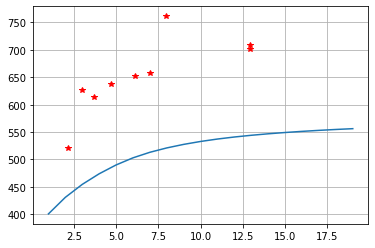

In [369]:
times = list(range(1, 20))
gcurve = [G(x, t) for t in times]
plt.plot(times, gcurve)
plt.plot(eurobonds_durations.iloc[0], eurobonds_ytms.iloc[0], color='r', linestyle='None', marker='*')
plt.grid()

In [460]:
ytms_std = eurobonds_ytms[eurobonds_ytms.index < '2018-03-01'].fillna(0)
stds = {}
for isin in ytms_std.columns:
    array = np.diff(ytms_std[isin])
    array = [boundary(diff, -M, M) for diff in array]
    stds[isin] = np.std(array)
stds

{'XS0971721963': 4.126397448935567,
 'RU000A0JWHA4': 51.70811397484842,
 'RU000A0JXU14': 23.395085389576604,
 'RU000A0JXTS9': 73.23364510145753,
 'RU000A0ZYYN4': 0.0,
 'RU000A1006S9': 0.0,
 'XS0767472458': 2.830516096031532,
 'XS0767473852': 4.521823502547829,
 'XS0971721450': 3.6853855286998427,
 'XS0504954347': 3.037928087106403,
 'XS0971721377': 4.142745539888358}

In [404]:
x

[array([530.47526581]),
 array([-225.66274634]),
 array([-55.66374634]),
 array([2.81813318]),
 array([0.96907245]),
 array([0.71387032]),
 array([-1.43381778]),
 array([-4.86167957]),
 array([-2.04406579]),
 array([-1.95656177]),
 array([-1.71082136]),
 array([0.99844863]),
 array([0.86775646])]

In [534]:
errorsGC = {'mae':{}, 'rmse':{}}
results_dict = {}
curves_dict = {}

Position of initial curve:


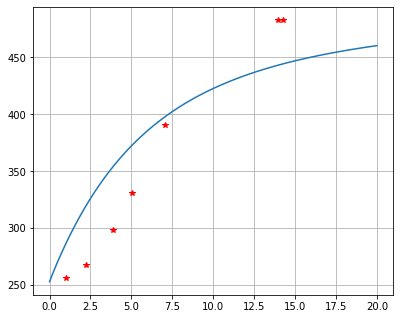

1 2018-01-01 00:00:00
Sum of errors squared:  12714.925413325263
Sum of bond price errors squared:  64.7261277924572
Parameter vector: [496.6694075446069, -247.72761688532594, -27.72761688532594, 2.999977968024782, 1.021949563189818, 1.316153876224077, 1.4271989494260688, 2.242882738629892, 2.435078188653412, 1.670504677396111, -0.04577742956448491, 1.0, 1.0]
Time:  15.369449853897095
2 2018-01-02 00:00:00
Sum of errors squared:  40338.856905273205
Sum of bond price errors squared:  767.9903518421884
Parameter vector: [447.6172119727165, -257.3252841114648, -37.32528411146478, 3.0006810887861555, 0.9926701414541386, 0.9518063189269343, 0.8943479888324413, 1.7055841010388215, 0.9268400985330217, -1.5867190448742863, -6.007992131912039, 1.0, 1.0]
Time:  18.646198987960815
3 2018-01-03 00:00:00
Sum of errors squared:  348793.96958707203
Sum of bond price errors squared:  5643.025980898797
Parameter vector: [349.5561086208866, -284.61124383643147, -64.61124383582123, 3.002758742904434, 0.9

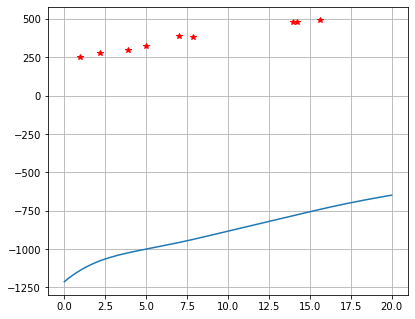

Time:  31.87186312675476
11 2018-01-15 00:00:00
Sum of errors squared:  18686737.89498592
Sum of bond price errors squared:  2756715.645744243
Parameter vector: [-509.48036177677545, -524.1809483108756, -304.18094831274766, 3.0375997148392955, 0.6310798665662708, -2.8870412482764447, -6.7629405424500035, -23.186793865864036, -85.43363465294935, -143.3706113216974, -127.62643876092532, 1.0, 1.0]
Time:  30.6337628364563
12 2018-01-16 00:00:00
Sum of errors squared:  21751885.537693683
Sum of bond price errors squared:  4152937.3504588795
Parameter vector: [-581.2210834075385, -549.4903025551217, -329.49030255699387, 3.042768973928038, 0.5976014854841897, -3.2603639649115363, -7.417558958894336, -25.49856284285389, -95.10398757125357, -159.18929605922688, -137.80054113283427, 1.0, 1.0]
Time:  28.364276885986328
13 2018-01-17 00:00:00
Sum of errors squared:  25007440.185848936
Sum of bond price errors squared:  6171064.413095936
Parameter vector: [-650.5652466537316, -574.4480679829597, -3

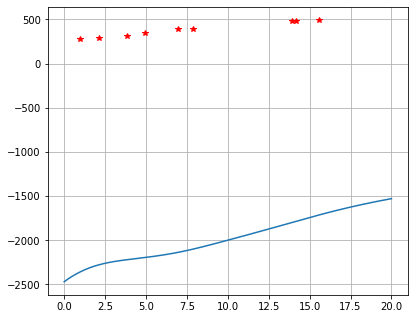

Time:  24.69691777229309
21 2018-01-29 00:00:00
Sum of errors squared:  59674841.44742092
Sum of bond price errors squared:  145508199.75606135
Parameter vector: [-1202.7544160336015, -773.826290334815, -553.8262903366872, 3.101751674638835, 0.30388797615055463, -6.462742270446127, -12.644348888931214, -44.78340274602615, -181.68966815912106, -301.47296112812757, -226.59916757136236, 1.0, 1.0]
Time:  24.782324075698853
22 2018-01-30 00:00:00
Sum of errors squared:  64864383.905916885
Sum of bond price errors squared:  216989703.572612
Parameter vector: [-1271.6040052674714, -798.7816426105752, -578.7816426124474, 3.1097518353145674, 0.2709007004053838, -6.805907124290809, -13.166400176408777, -46.79072657891973, -191.28383085068054, -317.3044377725028, -236.4689376047941, 1.0, 1.0]
Time:  23.812116861343384
23 2018-01-31 00:00:00
Sum of errors squared:  70233113.77668837
Sum of bond price errors squared:  324061198.3500618
Parameter vector: [-1340.4131269373236, -823.7510937196932, -60

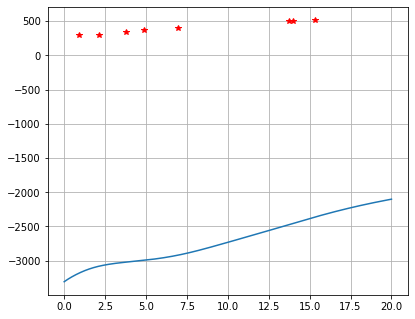

Time:  22.25473427772522
31 2018-02-12 00:00:00
Sum of errors squared:  72600361.65566263
Sum of bond price errors squared:  1461732360.4828577
Parameter vector: [-1596.8097199130061, -926.5953937938943, -706.5953937957665, 3.1519497961179535, -0.03022576227589256, -9.778794659837676, -17.241009548221594, -62.03840263150238, -243.8174489271363, -388.1611310947898, -278.7580599323831, 1.0, 1.0]
Time:  18.104861974716187
32 2018-02-13 00:00:00
Sum of errors squared:  84685994.16779351
Sum of bond price errors squared:  1561831018.32946
Parameter vector: [-1607.7924954895093, -931.924925685785, -711.9249256876572, 3.1534743550023627, -0.06530835667680354, -10.100966917260411, -17.642775825576717, -63.43046657354749, -245.8990400538902, -390.05163226016344, -279.8332941799212, 1.0, 1.0]
Time:  24.407243967056274
33 2018-02-14 00:00:00
Sum of errors squared:  97127998.84216237
Sum of bond price errors squared:  1663483168.8609102
Parameter vector: [-1618.126995230215, -937.020794045741, -71

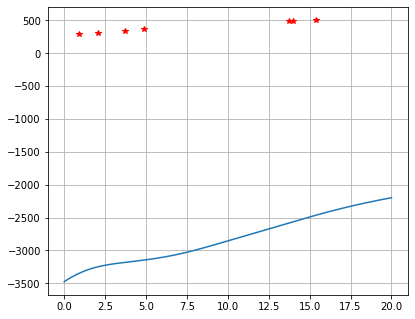

Time:  17.287779092788696
41 2018-02-26 00:00:00
Sum of errors squared:  78485445.8286223
Sum of bond price errors squared:  2314121757.4202385
Parameter vector: [-1674.4555585348248, -967.5554839827506, -747.5554839846228, 3.1629444665252358, 0.017939252948186213, -12.573851159919846, -20.74839808464489, -75.60870621528298, -259.6822353948708, -399.4382532765565, -284.8702308365435, 1.0, 1.0]
Time:  16.963971853256226
42 2018-02-27 00:00:00
Sum of errors squared:  79270501.72130296
Sum of bond price errors squared:  2408574025.860194
Parameter vector: [-1681.1337872350057, -971.3379791049279, -751.3379791068, 3.163889778496253, -0.023012577614196186, -12.89581013597503, -21.134385516703592, -76.95564891229748, -261.07434145226284, -400.3103583240508, -285.34229141938266, 1.0, 1.0]
Time:  18.159270763397217
43 2018-02-28 00:00:00
Sum of errors squared:  79993787.49553993
Sum of bond price errors squared:  2506849835.4404244
Parameter vector: [-1687.8084030894665, -975.1197688067061, -7

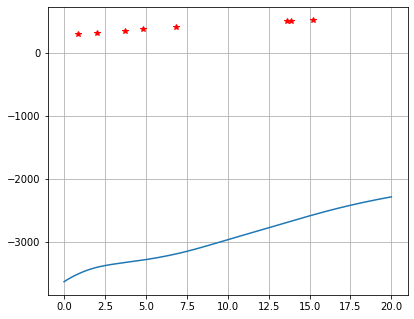

Time:  20.720489978790283
51 2018-03-12 00:00:00
Sum of errors squared:  85852324.12663615
Sum of bond price errors squared:  3515803552.8451743
Parameter vector: [-1744.7061229988324, -1006.6758004899239, -786.675800491796, 3.1731097511812125, -0.41965223755099695, -15.795169291034059, -24.57620933365431, -89.15479253033111, -274.1463574556732, -408.97510330795757, -290.07559025495254, 1.0, 1.0]
Time:  18.097028970718384
52 2018-03-13 00:00:00
Sum of errors squared:  112554913.55046968
Sum of bond price errors squared:  3673015108.326342
Parameter vector: [-1751.729168199719, -1010.5917921482776, -790.5917921501498, 3.1741484493811303, -0.5480317401329312, -16.197881665109847, -24.95405132453618, -90.59483267121719, -275.6462848597108, -409.98383623036943, -290.65190446939755, 1.0, 1.0]
Time:  23.886488914489746
53 2018-03-14 00:00:00
Sum of errors squared:  87190088.75575987
Sum of bond price errors squared:  3816576202.3519006
Parameter vector: [-1758.3563122109201, -1014.3638936098

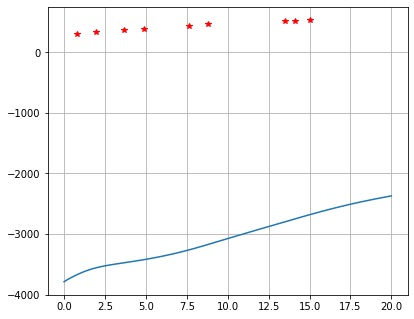

Time:  21.113131761550903
61 2018-03-26 00:00:00
Sum of errors squared:  134123124.20203045
Sum of bond price errors squared:  5278055927.259661
Parameter vector: [-1812.2954196305036, -1044.7593446712, -824.7593446730717, 3.1832527861658853, -0.9562550089057487, -19.0399886314355, -28.26336544725832, -102.7783291719394, -288.19385981905066, -417.89700378399084, -294.9691451626339, 1.0, 1.0]
Time:  24.7987699508667
62 2018-03-27 00:00:00
Sum of errors squared:  134952339.02551505
Sum of bond price errors squared:  5494737965.941051
Parameter vector: [-1818.9747007546066, -1048.6126703337127, -828.6126703355844, 3.184275000106898, -1.011541841689418, -19.361021890353374, -28.632605858757042, -104.16161055309121, -289.5775147722026, -418.7680537170081, -295.4419936605251, 1.0, 1.0]
Time:  24.13393998146057
63 2018-03-28 00:00:00
Sum of errors squared:  121293261.55358547
Sum of bond price errors squared:  5714120652.45937
Parameter vector: [-1825.5547930587793, -1052.375158694357, -832.3

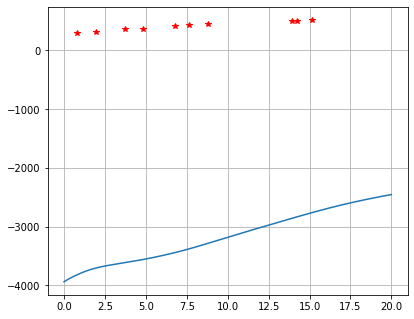

Time:  23.60111403465271
71 2018-04-09 00:00:00
Sum of errors squared:  143898783.70973146
Sum of bond price errors squared:  7832726823.967735
Parameter vector: [-1878.3556348117315, -1082.5615675558454, -862.5615675577169, 3.1935181547403224, -1.543512829275431, -22.24261345521732, -31.922016664770922, -116.45831121535032, -301.89077642837395, -426.4327454044325, -299.5979104722492, 1.0, 1.0]
Time:  24.198029041290283
72 2018-04-10 00:00:00
Sum of errors squared:  105846946.80872327
Sum of bond price errors squared:  2948774276.586279
Parameter vector: [-1884.9145250691508, -1086.3233324668768, -866.3233324687486, 3.194556511724633, -1.6071147802736072, -22.56166962990916, -32.283491246118196, -117.82867469673423, -303.2500501754758, -427.27482277787686, -300.0544466598128, 1.0, 1.0]
Time:  20.265773057937622
73 2018-04-11 00:00:00
Sum of errors squared:  102740859.10981956
Sum of bond price errors squared:  8457063562.376933
Parameter vector: [-1891.4477545438112, -1090.076273782395

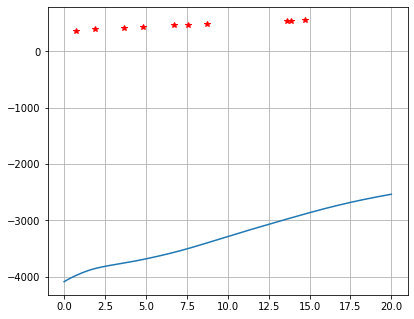

Time:  22.497806787490845
81 2018-04-23 00:00:00
Sum of errors squared:  155736483.35397702
Sum of bond price errors squared:  11579117514.608261
Parameter vector: [-1943.6023357431702, -1120.078597271758, -900.0785972736301, 3.2040008036748433, -2.214652731357406, -25.42010392551065, -35.50565218337429, -130.1925251184444, -315.4072180749082, -434.7682910497184, -304.1172228715782, 1.0, 1.0]
Time:  23.60524892807007
82 2018-04-24 00:00:00
Sum of errors squared:  156379566.90327272
Sum of bond price errors squared:  12043158858.59114
Parameter vector: [-1950.0963040713648, -1123.8241599669584, -903.8241599688301, 3.2050628773026393, -2.2873004652463353, -25.73621197540667, -35.85997172947905, -131.57053230460374, -316.75101823662095, -435.59447479279623, -304.5651572023569, 1.0, 1.0]
Time:  22.13632321357727
83 2018-04-25 00:00:00
Sum of errors squared:  157797437.9644293
Sum of bond price errors squared:  12526075370.211597
Parameter vector: [-1956.585671828193, -1127.5686719177875, -

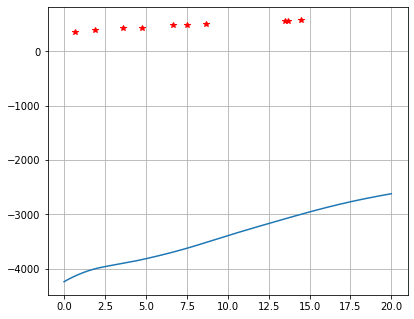

Time:  24.895076751708984
91 2018-05-07 00:00:00
Sum of errors squared:  166899019.2508109
Sum of bond price errors squared:  17081741609.02619
Parameter vector: [-2008.3226717739446, -1157.4878243794783, -937.4878243813508, 3.2147366966132664, -2.981860987361321, -28.56521621404083, -39.020727579184296, -144.0047843726533, -328.78867198478565, -442.9765160890853, -308.5681008936816, 1.0, 1.0]
Time:  24.343580961227417
92 2018-05-08 00:00:00
Sum of errors squared:  168054068.64897147
Sum of bond price errors squared:  17763255022.217094
Parameter vector: [-2014.7665939776093, -1161.2226412179068, -941.2226412197793, 3.2158238045614107, -3.0642079727330342, -28.877403376580435, -39.36846394947939, -145.39064996589838, -330.1193151907085, -443.79033208592205, -309.0095106672323, 1.0, 1.0]
Time:  24.233179092407227
93 2018-05-09 00:00:00
Sum of errors squared:  169900647.58213562
Sum of bond price errors squared:  18472253524.3427
Parameter vector: [-2021.2068842398623, -1164.956765820334

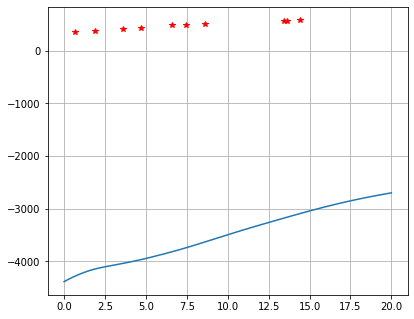

Time:  23.336693048477173
101 2018-05-21 00:00:00
Sum of errors squared:  177132003.0218376
Sum of bond price errors squared:  25149354970.156162
Parameter vector: [-2072.5613209405424, -1194.7954050987353, -974.7954051006083, 3.225721030172881, -3.848185195586898, -31.667247191025577, -42.47205383425787, -157.89600804877833, -342.0408337886687, -451.0654398387003, -312.95642699096686, 1.0, 1.0]
Time:  21.902507066726685
102 2018-05-22 00:00:00
Sum of errors squared:  177641069.7272547
Sum of bond price errors squared:  26147451818.39635
Parameter vector: [-2078.958400014254, -1198.5206278141893, -978.520627816062, 3.2268325691038564, -3.9408038077716783, -31.97457106654234, -42.81379095413786, -159.28977505883776, -343.3587139968185, -451.86767363141746, -313.3917794988788, 1.0, 1.0]
Time:  22.57943320274353
103 2018-05-23 00:00:00
Sum of errors squared:  178025426.77844447
Sum of bond price errors squared:  27184739262.18094
Parameter vector: [-2085.3518816676146, -1202.245169094034,

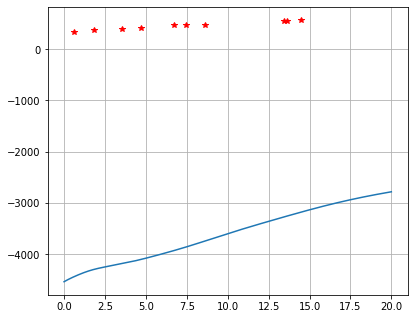

Time:  23.349613904953003
111 2018-06-04 00:00:00
Sum of errors squared:  186265280.81236088
Sum of bond price errors squared:  36955073217.74749
Parameter vector: [-2136.333927035075, -1232.007738250472, -1012.0077382523449, 3.2369450108394373, -4.819278224581293, -34.7168141479994, -45.86593307309332, -171.86619789539094, -355.1651780440918, -459.0392601465763, -317.28463146658663, 1.0, 1.0]
Time:  23.76860499382019
112 2018-06-05 00:00:00
Sum of errors squared:  187203054.00016233
Sum of bond price errors squared:  38415655325.130486
Parameter vector: [-2142.6846820515625, -1235.723508251176, -1015.723508253049, 3.2380799287472772, -4.922632746029789, -35.01837382422568, -46.20227836629758, -173.26785185370318, -356.4702450484389, -459.8300711629218, -317.71402700086986, 1.0, 1.0]
Time:  23.630249977111816
113 2018-06-06 00:00:00
Sum of errors squared:  188329812.1393387
Sum of bond price errors squared:  39933479569.19476
Parameter vector: [-2149.0318467667043, -1239.438596086452, 

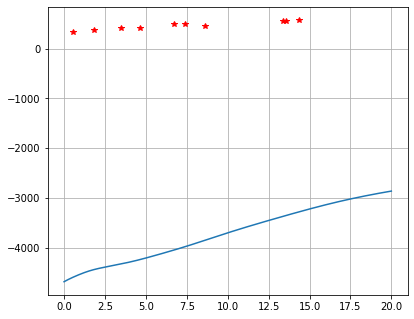

Time:  23.89876890182495
121 2018-06-18 00:00:00
Sum of errors squared:  198306108.614003
Sum of bond price errors squared:  54201439707.45526
Parameter vector: [-2199.6438596604403, -1269.125492148874, -1049.1254921507468, 3.248397856161391, -5.899244448289961, -37.705119786933246, -49.20854274919294, -185.91508853831377, -368.16091820621284, -466.8991548368384, -321.5534711853207, 1.0, 1.0]
Time:  23.55098009109497
122 2018-06-19 00:00:00
Sum of errors squared:  199295652.74744612
Sum of bond price errors squared:  56333403217.94583
Parameter vector: [-2205.948433005207, -1272.8317951981314, -1052.8317952000043, 3.249555047629889, -6.013666558691826, -38.000066400870935, -49.54012814124521, -187.32458710774117, -369.4530634150162, -467.67861659913893, -321.97695922530204, 1.0, 1.0]
Time:  23.485801935195923
123 2018-06-20 00:00:00
Sum of errors squared:  199785215.56898776
Sum of bond price errors squared:  58547330100.45201
Parameter vector: [-2212.2494242976945, -1276.5374145537012

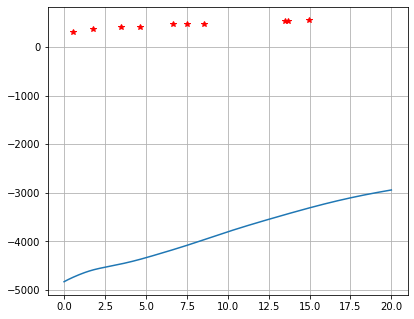

Time:  22.78593897819519
131 2018-07-02 00:00:00
Sum of errors squared:  206597801.05677626
Sum of bond price errors squared:  79332764237.58835
Parameter vector: [-2262.4925876872194, -1306.1484820478124, -1086.1484820496853, 3.2600685898767763, -7.090758502155402, -40.62392645056157, -52.50630359917934, -200.0421637144374, -381.0270002798563, -474.6458756715987, -325.76344739798935, 1.0, 1.0]
Time:  23.47307014465332
132 2018-07-03 00:00:00
Sum of errors squared:  207028867.51533377
Sum of bond price errors squared:  82436452607.75314
Parameter vector: [-2268.7511318148854, -1309.845294643781, -1089.845294645654, 3.261246967410944, -7.216423161957858, -40.91147244304939, -52.83378506681226, -201.4594425273933, -382.30612234289526, -475.41406537361746, -326.1810788296387, 1.0, 1.0]
Time:  22.096879959106445
133 2018-07-04 00:00:00
Sum of errors squared:  208020960.22903356
Sum of bond price errors squared:  85661620714.27747
Parameter vector: [-2275.006103517215, -1313.541421489413, -

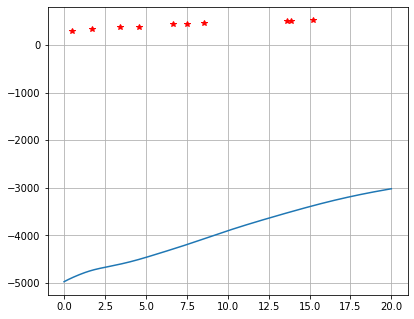

Time:  22.03893804550171
141 2018-07-16 00:00:00
Sum of errors squared:  214805252.65228215
Sum of bond price errors squared:  115885199214.15742
Parameter vector: [-2324.8816964988455, -1343.0764486481748, -1123.0764486500477, 3.2719464208304334, -8.394837054653513, -43.46564742350266, -55.76587368709418, -214.24669013240822, -393.7624433101001, -482.2802108008636, -329.9150753879643, 1.0, 1.0]
Time:  21.711585998535156
142 2018-07-17 00:00:00
Sum of errors squared:  216421698.06335467
Sum of bond price errors squared:  120398176963.09354
Parameter vector: [-2331.09437755514, -1346.7637462435032, -1126.763746245376, 3.273144913316298, -8.531751793243666, -43.74506899150587, -56.08992506418806, -215.6716610393203, -395.0284474805585, -483.0372088552698, -330.3269022990378, 1.0, 1.0]
Time:  21.503110885620117
143 2018-07-18 00:00:00
Sum of errors squared:  218050718.15657616
Sum of bond price errors squared:  125085448497.55676
Parameter vector: [-2337.303497092749, -1350.4503595755195,

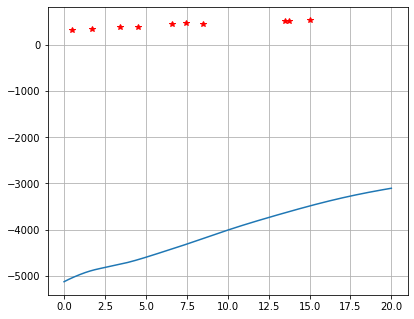

Time:  21.564488887786865
151 2018-07-30 00:00:00
Sum of errors squared:  227727513.61801496
Sum of bond price errors squared:  168938592783.50797
Parameter vector: [-2386.812905258088, -1379.909371882722, -1159.909371884595, 3.284020548011719, -9.81131381435443, -46.222953914416536, -58.993757834223345, -228.5275481056871, -406.3662848062475, -489.80295662913085, -334.0088699252829, 1.0, 1.0]
Time:  21.830302953720093
152 2018-07-31 00:00:00
Sum of errors squared:  228549410.4583572
Sum of bond price errors squared:  175481608453.42517
Parameter vector: [-2392.979904014215, -1383.5871786006958, -1163.5871786025687, 3.2852380668243257, -9.959402165291628, -46.4935158135687, -59.315007406603236, -229.96007119627146, -407.61907396971395, -490.5488421175485, -334.41494323340316, 1.0, 1.0]
Time:  23.50071406364441
153 2018-08-01 00:00:00
Sum of errors squared:  230128718.40555125
Sum of bond price errors squared:  182276336795.06653
Parameter vector: [-2399.1433547301576, -1387.26429959936

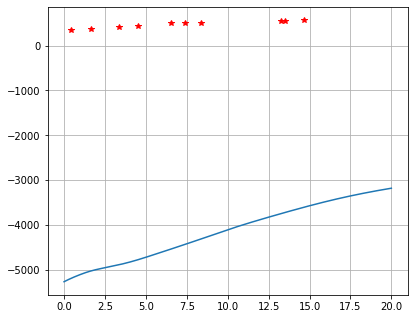

Time:  24.79156517982483
161 2018-08-13 00:00:00


KeyboardInterrupt: 

In [704]:
# x = [530, -225, -55, 3, .96, .71, -1.4, -5, -2, -2, -1.7, 1, 1]

# beta0 = 530
# beta1 = -225
# beta2 = -55
# tau = 3
# g1 = .96
# g2 = .71
# g3 = -1.4
# g4 = -5
# g5 = -2
# g6 = -2
# g7 = -1.7
# g8 = 1
# g9 = 1
beta0 = 500
beta1 = -250
beta2 = -30
tau = 3
g1 = 1
g2 = 1
g3 = 1
g4 = 1
g5 = 1
g6 = 1
g7 = 1
g8 = 1
g9 = 1
x = [beta0, beta1, beta2, tau, g1, g2, g3, g4, g5, g6, g7, g8, g9]
k = 1
errors = []
print('Position of initial curve:')
times = np.linspace(0, 20, 10000)[1:]
gcurve = [G(x, t) for t in times]
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])


axes.plot(times, gcurve)
axes.plot(eurobonds_durations.loc['2018-01-01'], eurobonds_ytms.loc['2018-01-01'], color='r', linestyle='None', marker='*')
axes.grid()


plt.ion()
plt.show()
for date in eurobonds_ytms.index:
    start = time.time()
    print(k, date)
    z = 1
    for isin in eurobonds_ytms.columns:
#         date = eurobonds_prices.index[0]
        # isin = trades['SECCODE'].iloc[0]
#         isin = eurobonds_prices.columns[0]
#         print(z, isin)
        if math.isnan(eurobonds_ytms[isin][date]): continue
        current_payments = payments[payments.index > date]
        times = ((current_payments.index - date) / timedelta(days=365))
        discounts = [D(x, t) for t in times]
        price = (np.sum(current_payments[isin]*list(np.array(discounts).reshape((len(current_payments,))))) / eurobonds_info.set_index('isin').to_dict()['face value'][isin]) * 100
                                                                                                                             
#         print(price)
#         print(B(x))
#         print(YTM(x))
        h = list(np.zeros_like(x))
        delta = .001
        for i in range(len(x)):
            x0 = x.copy()
            x0[i] += delta
        #     print(x0)
            h[i] = float((YTM(x0) - YTM(x))/ delta)
#         print(h)
        Q = (np.array(h) ** 2 * np.array(gamma) ** 2).sum()
        delta = boundary( YTM(x) - eurobonds_ytms[isin][date], -fi*stds[isin], fi*stds[isin])
        ttm = (eurobonds_info.set_index('isin').to_dict()['maturity date'][isin] - date) / timedelta(days=365)
        Lambda = max(mi[0]*np.exp(-ttm/tau1)+mi[1], stds[isin]) ** 2
#         print('Q, delta, Lambda')
#         print(Q, delta, Lambda)
#         print(x[:2])
#         print(h[:2])
#         print('delta:', delta)
        if delta ** 2 < (Q + Lambda) / d:
            for j in range(len(x)):
                x[j] = alpha[j] * x[j] + h[j]*(gamma[j]**2)*delta / (Q + Lambda +d*delta**2)
        else:
#             print('delta ** 2 < (Q + Lambda) / d', np.sign(delta))
            for j in range(len(x)):
                x[j] = alpha[j] * x[j] + np.sign(delta) * h[j]*(gamma[j]**2) / 2*(np.sqrt((Q + Lambda)*d))
        x = list(np.array(x).reshape((13, )))
        z += 1
    error = 0
    
    for isin in eurobonds_durations.columns:
        if math.isnan(eurobonds_ytms[isin][date]): continue
        t = eurobonds_durations[isin][date]
        error += (G(x,t) - eurobonds_ytms[isin][date]) ** 2
#         error_mae += abs(G(x,t) - eurobonds_ytms[isin][date])
    error_sq = 0
    error_mae = 0
    discounts = [D(x, t) for t in times]
    z=0
    for isin in eurobonds_durations.loc[date][eurobonds_durations.loc[date] > .5].index:
        z += 1
        price = (np.sum(current_payments[isin]*list(np.array(discounts).reshape((len(current_payments,))))) / eurobonds_info.set_index('isin').to_dict()['face value'][isin]) * 100
        error_mae += abs(eurobonds_prices[isin][date] - price)
        error_sq += (eurobonds_prices[isin][date] - price) ** 2
    errorsGC['mae'][dt.strftime(date, '%Y-%m-%d')] = error_mae / z
    errorsGC['rmse'][dt.strftime(date, '%Y-%m-%d')] = (error_sq / z) ** .5
    print('Sum of errors squared: ', error)
    print('Sum of bond price errors squared: ', error_sq)
    print('Parameter vector:', x)
    results_dict[dt.strftime(date, '%Y-%m-%d')] = x
    errors += [error]
    if k % 10 == 0:
        times = np.linspace(0, 20, 10000)[1:]
        
        gcurve = [G(x, t) for t in times]
        fig = plt.figure(figsize=(5, 4))
        axes = fig.add_axes([0, 0, 1, 1])


        axes.plot(times, gcurve)
        axes.plot(eurobonds_durations.loc[date], eurobonds_ytms.loc[date], color='r', linestyle='None', marker='*')
        axes.grid()
        plt.ion()
        plt.show()
    print('Time: ', time.time() - start)
#     errors = 0






    k += 1


In [634]:
eurobonds_ytms.head(8)

,XS0971721963,RU000A0JWHA4,RU000A0JXU14,RU000A0JXTS9,RU000A0ZYYN4,RU000A1006S9,XS0767472458,XS0767473852,XS0971721450,XS0504954347,XS0971721377
Trade date,,,,,,,,,,,
2018-01-01,482.983723,390.878365,NaN,NaN,NaN,NaN,297.940336,482.879268,331.198848,267.520045,256.096014
2018-01-02,483.071984,389.471742,499.361344,387.367742,NaN,NaN,299.081498,482.180522,328.268064,269.990180,245.992602
2018-01-03,480.658281,390.240359,498.514710,384.858984,NaN,NaN,300.101206,480.682034,325.620827,269.264583,246.951445
2018-01-04,479.327354,387.178041,494.738891,383.897612,NaN,NaN,299.515253,479.568647,326.956709,268.778939,246.677586
2018-01-05,476.817085,378.735857,500.678457,388.064190,NaN,NaN,294.050666,470.929959,317.158322,267.413312,247.643670
2018-01-08,472.499838,378.650436,487.967590,NaN,NaN,NaN,294.630157,471.317202,315.909410,264.952994,246.820162
2018-01-09,475.623439,380.761977,488.433313,379.405964,NaN,NaN,298.187410,474.025697,319.667051,267.438857,244.034528
2018-01-10,480.069921,380.479994,488.430664,379.304517,NaN,NaN,298.342551,479.248953,323.136888,268.274159,256.334819


(160, 999) (160, 999) (160, 999)


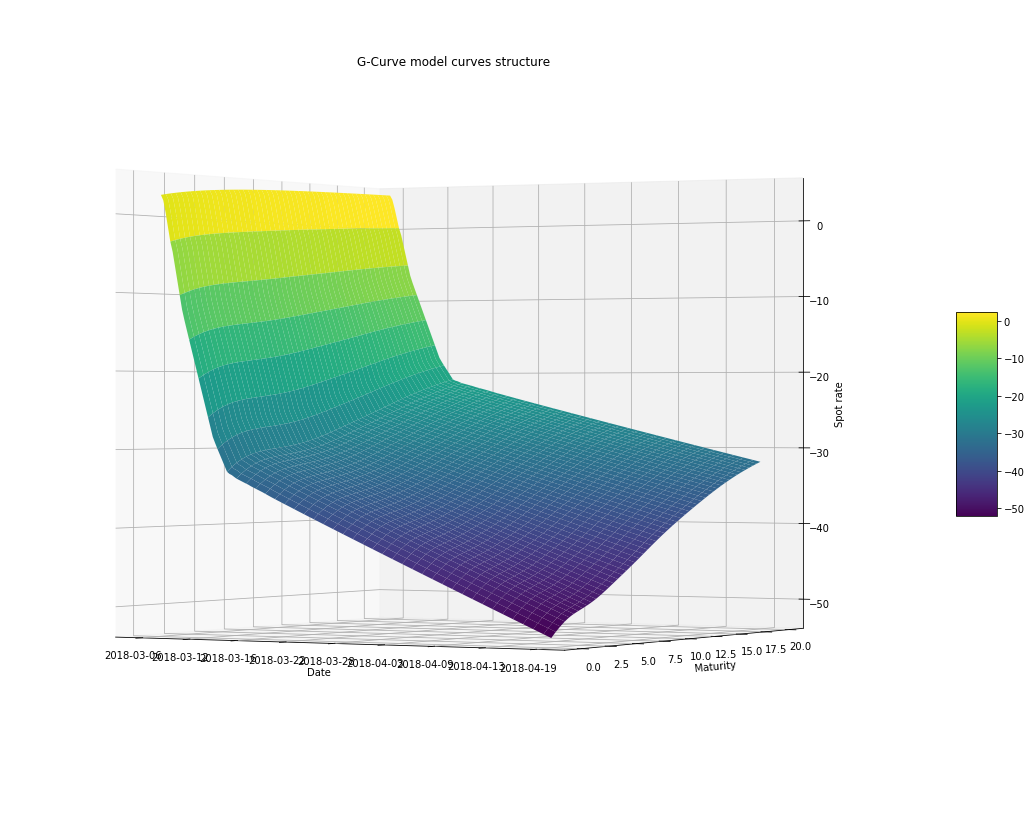

In [707]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import cm
t = np.linspace(0, 20, 1000)[1:]
curves_GC = np.array([G(np.asarray(results_dict[date]), t) for date in sorted(results_dict.keys())[:160]]) / 100
z = np.array([x for x in range(1, 161)])
t, z = np.meshgrid(t, z)
print(np.shape(t), np.shape(z), np.shape(curves_GC))
fig = plt.figure(figsize=(20, 15))
ax = fig.gca(projection='3d')
gr = ax.plot_surface(z, t, curves_GC, cmap=cm.viridis)
# ax.set_zbound([])
fig.colorbar(gr, shrink=0.25, aspect=5)
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)
ax.set(title='G-Curve model curves structure', xlabel='Date', ylabel="Maturity", zlabel='Spot rate')
ax.set_xticklabels([dt.strftime(x, '%Y-%m-%d') for x in list(eurobonds_prices.index)][42:142:4])
ax.view_init(0, -60)

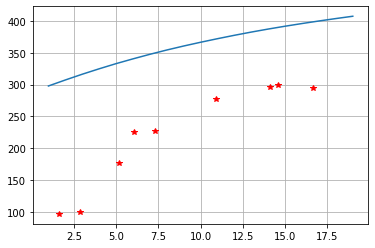

In [572]:
times = list(range(1, 20))
gcurve = [G(x, t) for t in times]
plt.plot(times, gcurve)
plt.plot(eurobonds_durations.loc[date], eurobonds_ytms.loc[date], color='r', linestyle='None', marker='*')
plt.grid()   

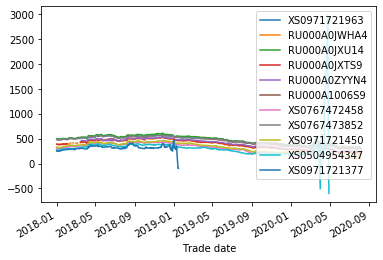

In [619]:
eurobonds_ytms.plot()

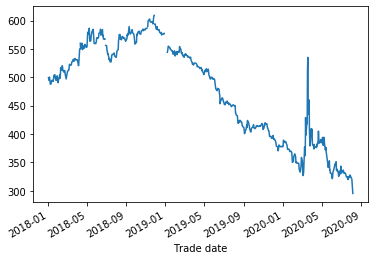

In [628]:
eurobonds_ytms['RU000A0JXU14'].plot()

In [623]:
eurobonds_ytms.isna().sum()

XS0971721963      0
RU000A0JWHA4     24
RU000A0JXU14     10
RU000A0JXTS9     35
RU000A0ZYYN4     67
RU000A1006S9    319
XS0767472458      0
XS0767473852      0
XS0971721450      0
XS0504954347     75
XS0971721377    406
dtype: int64

In [624]:
stds

{'XS0971721963': 4.126397448935567,
 'RU000A0JWHA4': 51.70811397484842,
 'RU000A0JXU14': 23.395085389576604,
 'RU000A0JXTS9': 73.23364510145753,
 'RU000A0ZYYN4': 0.0,
 'RU000A1006S9': 0.0,
 'XS0767472458': 2.830516096031532,
 'XS0767473852': 4.521823502547829,
 'XS0971721450': 3.6853855286998427,
 'XS0504954347': 3.037928087106403,
 'XS0971721377': 4.142745539888358}

In [668]:
errorsKF_mae = pd.read_csv('Errors_KF_mae.csv', index_col=0)
errorsKF_rmse = pd.read_csv('Errors_KF_rmse.csv', index_col=0)
errorsKF_mae
errorsKF = {
'mae':errorsKF_mae.to_dict()['0'],
'rmse':errorsKF_rmse.to_dict()['0']
}


In [715]:
import json
with open('errorsNSS.txt', 'r') as file:
    errors = json.load(file)

In [658]:
errors.keys()

dict_keys(['NS', 'NS_dw', 'NSS', 'NSS_dw'])

In [659]:
errors['NS'].keys()

dict_keys(['mae', 'rmse'])

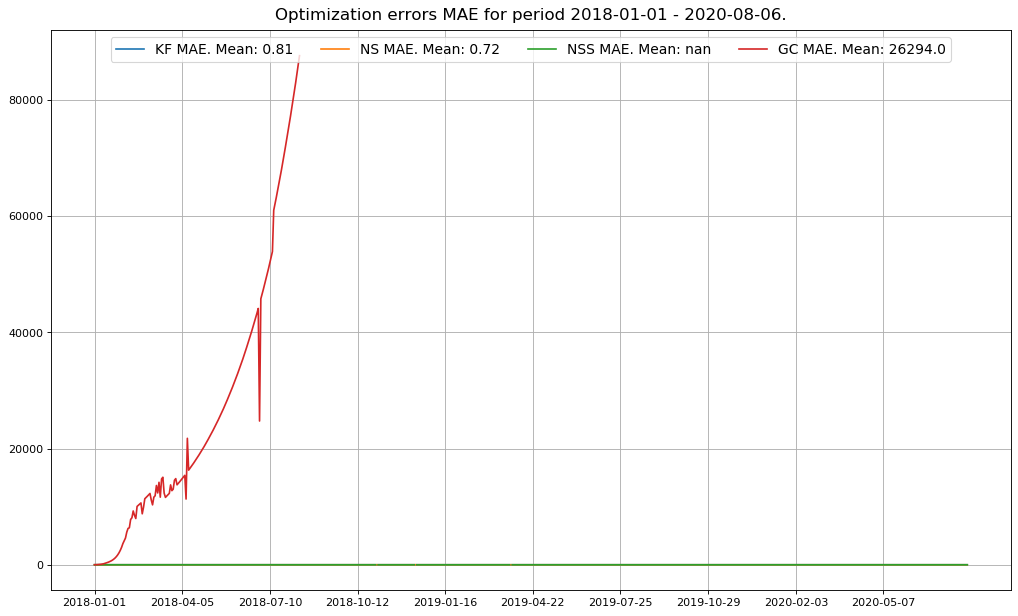

In [731]:
fig = plt.figure( figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Optimization errors MAE for period 2018-01-01 - 2020-08-06.', y=1.04, fontsize=15)
# axes1 = fig.add_subplot(211)
axes1 = fig.add_axes([0, 0, 1, 1])
# axes1.xaxis_date()
errors_mae = pd.Series(errorsKF['mae'])
errors_rmse = pd.Series(errorsKF['rmse'])




axes1.plot(*zip(*sorted(errorsKF['mae'].items())), label='KF MAE. Mean: {}'.format(round(np.array([errorsKF['mae'][k] for k in errorsKF['mae']]).mean(), 2)))
# axes1.plot(*zip(*sorted(errorsGC['mae'].items())), label='GC MAE. Mean: {}'.format(round(np.array([errorsGC['mae'][k] for k in errorsGC['mae']]).mean()), 2))
axes1.plot(*zip(*sorted(errors['NS']['mae'].items())), label='NS MAE. Mean: {}'.format(round(np.array([errors['NS']['mae'][k] for k in errors['NS']['mae']]).mean(), 2)))
axes1.plot(*zip(*sorted(errors['NSS']['mae'].items())), label='NSS MAE. Mean: {}'.format(round(np.array([errors['NSS']['mae'][k] for k in errors['NSS']['mae']]).mean(), 2)))
axes1.plot(pd.Series(errorsGC['mae'])[:160], label='GC MAE. Mean: {}'.format(round(pd.Series(errorsGC['mae'])[:160].mean(), 2)))


axes1.grid()
axes1.legend(ncol=4, loc=9, fontsize=12.5)
# axes1.set_title('Nelder-Mead', fontsize=14)
plt.xticks(np.arange(0, 678, step=68)) 
axes1.set_xmargin(0)


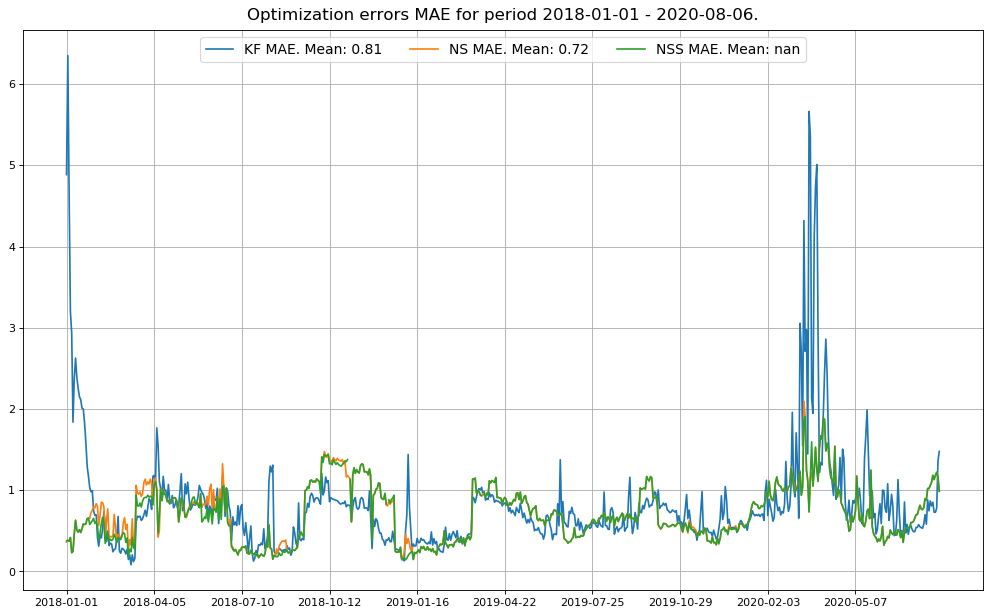

In [726]:
fig = plt.figure( figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Optimization errors MAE for period 2018-01-01 - 2020-08-06.', y=1.04, fontsize=15)
# axes1 = fig.add_subplot(211)
axes1 = fig.add_axes([0, 0, 1, 1])
# axes1.xaxis_date()
errors_mae = pd.Series(errorsKF['mae'])
errors_rmse = pd.Series(errorsKF['rmse'])




axes1.plot(*zip(*sorted(errorsKF['mae'].items())), label='KF MAE. Mean: {}'.format(np.round(np.array([errorsKF['mae'][k] for k in errorsKF['mae']]).mean(), 2)))
# axes1.plot(*zip(*sorted(errorsGC['mae'].items())), label='GC MAE. Mean: {}'.format(round(np.array([errorsGC['mae'][k] for k in errorsGC['mae']]).mean()), 2))
axes1.plot(*zip(*sorted(errors['NS']['mae'].items())), label='NS MAE. Mean: {}'.format(round(np.array([errors['NS']['mae'][k] for k in errors['NS']['mae']]).mean(), 2)))
axes1.plot(*zip(*sorted(errors['NSS']['mae'].items())), label='NSS MAE. Mean: {}'.format(round(np.array([errors['NSS']['mae'][k] for k in errors['NSS']['mae']]).mean(), 2)))
# axes1.plot(pd.Series(errorsGC['mae'])[:237], label='GC MAE. Mean: {}'.format(round(pd.Series(errorsGC['mae'])[:237].mean(), 2)))


axes1.grid()
axes1.legend(ncol=4, loc=9, fontsize=12.5)
# axes1.set_title('Nelder-Mead', fontsize=14)
plt.xticks(np.arange(0, 678, step=68)) 
axes1.set_xmargin(0)

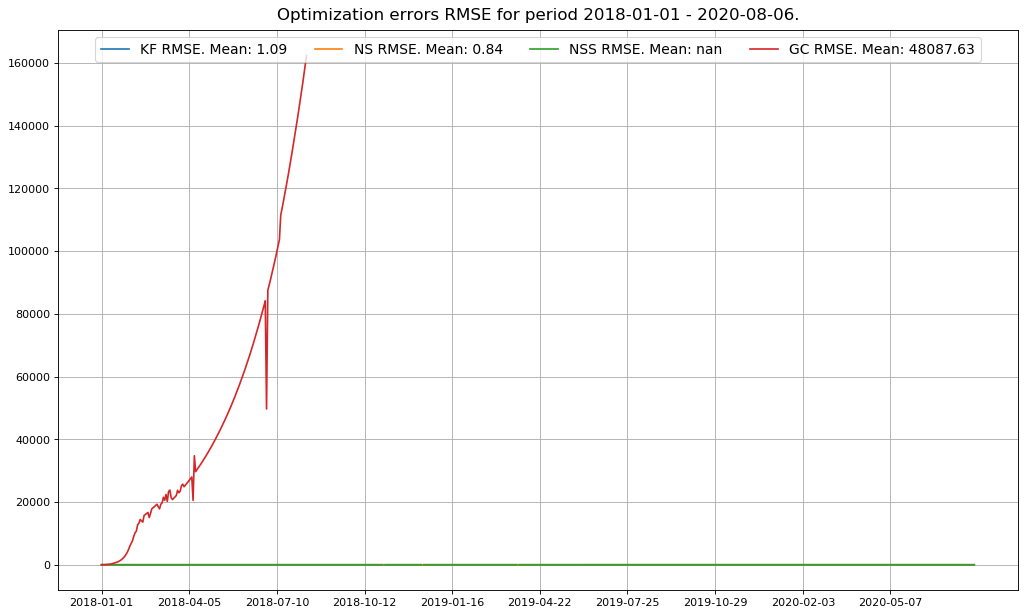

In [730]:
fig = plt.figure( figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Optimization errors RMSE for period 2018-01-01 - 2020-08-06.', y=1.04, fontsize=15)
# axes1 = fig.add_subplot(211)
axes1 = fig.add_axes([0, 0, 1, 1])
# axes1.xaxis_date()
errors_rmse = pd.Series(errorsKF['rmse'])
errors_rmse = pd.Series(errorsKF['rmse'])




axes1.plot(*zip(*sorted(errorsKF['rmse'].items())), label='KF RMSE. Mean: {}'.format(np.round(np.array([errorsKF['rmse'][k] for k in errorsKF['rmse']]).mean(), 2)))
# axes1.plot(*zip(*sorted(errorsGC['rmse'].items())), label='GC rmse. Mean: {}'.format(round(np.array([errorsGC['rmse'][k] for k in errorsGC['rmse']]).mean()), 2))
axes1.plot(*zip(*sorted(errors['NS']['rmse'].items())), label='NS RMSE. Mean: {}'.format(round(np.array([errors['NS']['rmse'][k] for k in errors['NS']['rmse']]).mean(), 2)))
axes1.plot(*zip(*sorted(errors['NSS']['rmse'].items())), label='NSS RMSE. Mean: {}'.format(round(np.array([errors['NSS']['rmse'][k] for k in errors['NSS']['rmse']]).mean(), 2)))
axes1.plot(pd.Series(errorsGC['rmse'])[:160], label='GC RMSE. Mean: {}'.format(round(pd.Series(errorsGC['rmse'])[:161].mean(), 2)))


axes1.grid()
axes1.legend(ncol=4, loc=9, fontsize=12.5)
# axes1.set_title('Nelder-Mead', fontsize=14)
plt.xticks(np.arange(0, 678, step=68)) 
axes1.set_xmargin(0)

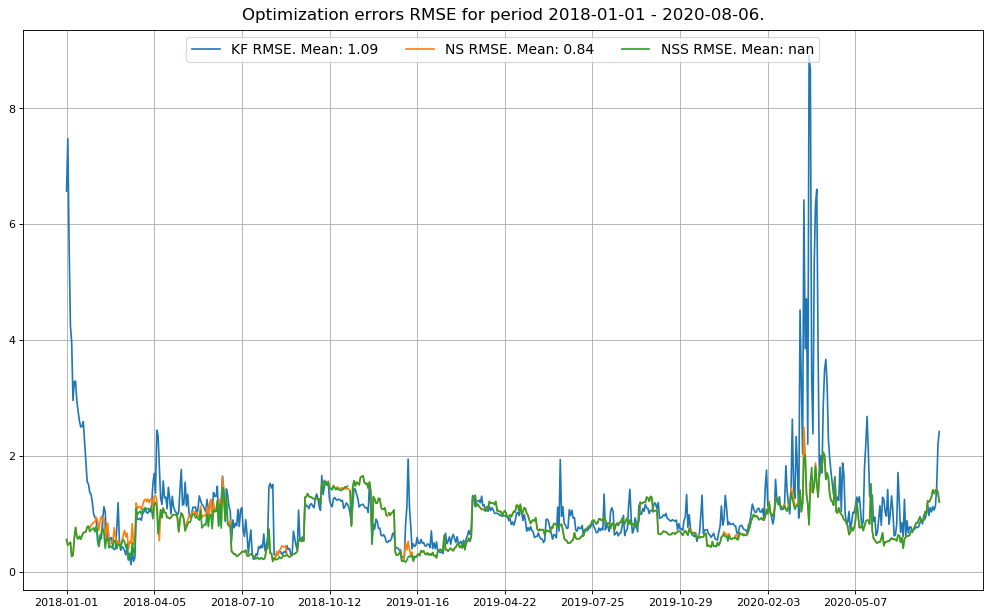

In [725]:
fig = plt.figure( figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Optimization errors RMSE for period 2018-01-01 - 2020-08-06.', y=1.04, fontsize=15)
# axes1 = fig.add_subplot(211)
axes1 = fig.add_axes([0, 0, 1, 1])
# axes1.xaxis_date()
errors_rmse = pd.Series(errorsKF['rmse'])
errors_rmse = pd.Series(errorsKF['rmse'])




axes1.plot(*zip(*sorted(errorsKF['rmse'].items())), label='KF RMSE. Mean: {}'.format(round(np.array([errorsKF['rmse'][k] for k in errorsKF['rmse']]).mean(), 2)))
# axes1.plot(*zip(*sorted(errorsGC['rmse'].items())), label='GC rmse. Mean: {}'.format(round(np.array([errorsGC['rmse'][k] for k in errorsGC['rmse']]).mean()), 2))
axes1.plot(*zip(*sorted(errors['NS']['rmse'].items())), label='NS RMSE. Mean: {}'.format(round(np.array([errors['NS']['rmse'][k] for k in errors['NS']['rmse']]).mean(), 2)))
axes1.plot(*zip(*sorted(errors['NSS']['rmse'].items())), label='NSS RMSE. Mean: {}'.format(round(np.array([errors['NSS']['rmse'][k] for k in errors['NSS']['rmse']]).mean(), 2)))
# axes1.plot(pd.Series(errorsGC['rmse'])[:237], label='GC RMSE. Mean: {}'.format(round(pd.Series(errorsGC['rmse'])[:237].mean(), 2)))


axes1.grid()
axes1.legend(ncol=4, loc=9, fontsize=12.5)
# axes1.set_title('Nelder-Mead', fontsize=14)
plt.xticks(np.arange(0, 678, step=68)) 
axes1.set_xmargin(0)

In [675]:
pd.Series(errorsGC['mae'])

2018-01-01     2.890599
2018-01-02    12.668455
2018-01-03    21.994490
2018-01-04    29.842702
2018-01-05    36.570444
                ...    
2020-07-31     9.150555
2020-08-03     9.360213
2020-08-04    10.218392
2020-08-05    11.325022
2020-08-06    11.806993
Length: 678, dtype: float64

In [697]:
np.array([errors['NSS']['mae'][k] for k in errors['NSS']['mae']])[~np.isnan(np.array([errors['NSS']['mae'][k] for k in errors['NSS']['mae']]))].mean()

0.6979942450859493